In [99]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ruptures as rpt

In [100]:
# Set display options to show more rows and columns
pd.set_option('display.max_rows', None)  # To show all rows
pd.set_option('display.max_columns', None)  # To show all columns
pd.set_option('display.width', None)  # To adjust the display width

In [101]:
def getValues1(tagList):
    url = "https://exactspace.co/kairosapi/api/v1/datapoints/query"
    d = {
        "metrics": [
            {
                "tags": {},
                "name": "",
                "aggregators": [
                    {
                        "name": "avg",
                        "sampling": {
                            "value": "1",
                            "unit": "minutes"
                        }
                    }
                ]
            }
        ],
        "plugins": [],
        "cache_time": 0,
        "cache_time": 0,
        "start_relative": {
        "value": "2",
        "unit": "days"
      }
    }
    finalDF = pd.DataFrame()
    for tag in tagList:
        d['metrics'][0]['name'] = tag
        res = requests.post(url=url, json=d)
        values = json.loads(res.content)
        df = pd.DataFrame(values["queries"][0]["results"][0]['values'], columns=['time', values["queries"][0]["results"][0]['name']])
        finalDF = pd.concat([finalDF, df], axis=1)

    finalDF = finalDF.loc[:, ~finalDF.columns.duplicated()]
    finalDF.dropna(subset=['time'], inplace=True)
    finalDF['time'] = pd.to_datetime(finalDF['time'], unit='ms').dt.strftime('%d-%m-%y %H:%M')

    return finalDF

In [102]:
tags= [
    'GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric',
    'GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric',
    'GAP_GAP03.PLC03.SCHENCK2_FEED_RATE',
    'GAP_9dfb_BallMill_Total_Power',       # Ball mill Tags
    'GAP_GAP01.PLC01._362_E200_JIT_01.PV',
    'GAP_GAP01.PLC01._362_E310_FIT_01.PV',
    'GAP_GAP01.PLC01._362_E200_ST_01.PV', # Mixer Tags
    'GAP_GAP04.PLC04.Power_M1',
    'GAP_GAP04.PLC04.Power_M2',
    'GAP_GAP04.PLC04.MLD1_DATA_Anode_Height',
    'GAP_GAP04.PLC04.MLD2_DATA_Anode_Height',
    'GAP_GAP01.PLC01._362_E290_LIT_01.PV', #Fines silo level
    'GAP_GAP01.PLC01._362_E090_LIT_01.PV', #Grains silo level
    'GAP_GAP04.PLC04.K363_K180_PIT_01_PV', #Hydraulic pressure
    'GAP_GAP04.PLC04.K050_PIT_01_PV', #Mould 2 clamping pressure
    'GAP_GAP04.PLC04.MLD1_DATA_Mixer_Total_Power', #mixer power
    'GAP_GAP04.PLC04.MLD1_DATA_Anode_Weight', # anode m1 weight
    'GAP_GAP04.PLC04.MLD2_DATA_Anode_Weight', # anode m2 weight
    'GAP_GAP04.PLC04.MLD2_DATA_Anode_Dry_Density',
    'GAP_GAP04.PLC04.MLD1_DATA_Anode_Dry_Density',
    'GAP_GAP01.PLC01._362_E020_VT_01.PV',
    'GAP_GAP01.PLC01._362_E020_MVF_01.ACTRL.AUTOSPEEDREF',
    'GAP_GAP01.PLC01._362_E015_LIT_01.PV' #rhodax tags
]

In [103]:
raw_data=getValues1(tags)

In [104]:
raw_data.head()

time  GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric  \
0  21-10-23 09:09                                   1.676580   
1  21-10-23 09:10                                   1.676580   
2  21-10-23 09:11                                   1.676580   
3  21-10-23 09:12                                   1.676895   
4  21-10-23 09:13                                   1.677000   

   GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric  \
0                                   1.661260   
1                                   1.660215   
2                                   1.657080   
3                                   1.657080   
4                                   1.657080   

   GAP_GAP03.PLC03.SCHENCK2_FEED_RATE  GAP_9dfb_BallMill_Total_Power  \
0                         5962.352050                      20.832675   
1                         5987.184207                      20.303300   
2                         5987.245485                      20.360400   
3                         5962.354368                      20.943400   
4                         5866.752075                      20.703400   

   GAP_GAP01.PLC01._362_E200_JIT_01.PV  GAP_GAP01.PLC01._362_E310_FIT_01.PV  \
0                            20.832697                             0.000000   
1                            20.303303                             0.000000   
2                            20.360420                             2.464577   
3                            20.943405                             2.670843   
4                            20.838290                             1.872348   

   GAP_GAP01.PLC01._362_E200_ST_01.PV  GAP_GAP04.PLC04.Power_M1  \
0                           97.933368                 32.138970   
1                           98.066847                 32.138970   
2                           98.019247                 32.458467   
3                           97.991272                 33.416960   
4                           97.998630                 33.416960   

   GAP_GAP04.PLC04.Power_M2  GAP_GAP04.PLC04.MLD1_DATA_Anode_Height  \
0                 32.186302                              676.417050   
1                 32.328300                              680.692075   
2                 32.328300                              684.967100   
3                 32.328300                              684.967100   
4                 32.422970                              684.200362   

   GAP_GAP04.PLC04.MLD2_DATA_Anode_Height  \
0                              679.051940   
1                              679.051940   
2                              677.690872   
3                              673.607670   
4                              673.607670   

   GAP_GAP01.PLC01._362_E290_LIT_01.PV  GAP_GAP01.PLC01._362_E090_LIT_01.PV  \
0                            28.847632                            70.762715   
1                            29.223038                            71.995912   
2                            29.966003                            73.305670   
3                            30.815945                            74.560460   
4                            31.923025                            73.437183   

   GAP_GAP04.PLC04.K363_K180_PIT_01_PV  GAP_GAP04.PLC04.K050_PIT_01_PV  \
0                           214.942985                      292.125412   
1                           216.396880                      138.179968   
2                           224.856407                      170.155835   
3                           215.270072                      214.723137   
4                           215.717430                      170.334463   

   GAP_GAP04.PLC04.MLD1_DATA_Mixer_Total_Power  \
0                                   121.500370   
1                                   119.923060   
2                                   118.345750   
3                                   118.345750   
4                                   118.296487   

   GAP_GAP04.PLC04.MLD1_DATA_Anode_Weight  \
0                             1064.205200   
1                  

In [105]:
data = raw_data.copy()

In [106]:
data.shape

(1423, 24)

In [107]:
data=data[(data['GAP_GAP03.PLC03.SCHENCK2_FEED_RATE']>=5500) & (data['GAP_GAP03.PLC03.SCHENCK2_FEED_RATE']<6400)]

In [108]:
data.shape

(1139, 24)

In [109]:
data.head()

time  GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric  \
0  21-10-23 09:09                                   1.676580   
1  21-10-23 09:10                                   1.676580   
2  21-10-23 09:11                                   1.676580   
3  21-10-23 09:12                                   1.676895   
4  21-10-23 09:13                                   1.677000   

   GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric  \
0                                   1.661260   
1                                   1.660215   
2                                   1.657080   
3                                   1.657080   
4                                   1.657080   

   GAP_GAP03.PLC03.SCHENCK2_FEED_RATE  GAP_9dfb_BallMill_Total_Power  \
0                         5962.352050                      20.832675   
1                         5987.184207                      20.303300   
2                         5987.245485                      20.360400   
3                         5962.354368                      20.943400   
4                         5866.752075                      20.703400   

   GAP_GAP01.PLC01._362_E200_JIT_01.PV  GAP_GAP01.PLC01._362_E310_FIT_01.PV  \
0                            20.832697                             0.000000   
1                            20.303303                             0.000000   
2                            20.360420                             2.464577   
3                            20.943405                             2.670843   
4                            20.838290                             1.872348   

   GAP_GAP01.PLC01._362_E200_ST_01.PV  GAP_GAP04.PLC04.Power_M1  \
0                           97.933368                 32.138970   
1                           98.066847                 32.138970   
2                           98.019247                 32.458467   
3                           97.991272                 33.416960   
4                           97.998630                 33.416960   

   GAP_GAP04.PLC04.Power_M2  GAP_GAP04.PLC04.MLD1_DATA_Anode_Height  \
0                 32.186302                              676.417050   
1                 32.328300                              680.692075   
2                 32.328300                              684.967100   
3                 32.328300                              684.967100   
4                 32.422970                              684.200362   

   GAP_GAP04.PLC04.MLD2_DATA_Anode_Height  \
0                              679.051940   
1                              679.051940   
2                              677.690872   
3                              673.607670   
4                              673.607670   

   GAP_GAP01.PLC01._362_E290_LIT_01.PV  GAP_GAP01.PLC01._362_E090_LIT_01.PV  \
0                            28.847632                            70.762715   
1                            29.223038                            71.995912   
2                            29.966003                            73.305670   
3                            30.815945                            74.560460   
4                            31.923025                            73.437183   

   GAP_GAP04.PLC04.K363_K180_PIT_01_PV  GAP_GAP04.PLC04.K050_PIT_01_PV  \
0                           214.942985                      292.125412   
1                           216.396880                      138.179968   
2                           224.856407                      170.155835   
3                           215.270072                      214.723137   
4                           215.717430                      170.334463   

   GAP_GAP04.PLC04.MLD1_DATA_Mixer_Total_Power  \
0                                   121.500370   
1                                   119.923060   
2                                   118.345750   
3                                   118.345750   
4                                   118.296487   

   GAP_GAP04.PLC04.MLD1_DATA_Anode_Weight  \
0                             1064.205200   
1                  

In [110]:
data = data[(data['GAP_GAP04.PLC04.MLD2_DATA_Anode_Dry_Density'] <= 1.49) & 
            (data['GAP_GAP04.PLC04.MLD1_DATA_Anode_Dry_Density'] <= 1.49) & 
            (data['GAP_GAP04.PLC04.MLD2_DATA_Anode_Dry_Density'] > 0) & 
            (data['GAP_GAP04.PLC04.MLD1_DATA_Anode_Dry_Density'] > 0) & 
            (data['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'] <= 1.69) & 
            (data['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'] <= 1.69) & 
            (data['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'] >= 1.56) & 
            (data['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'] >= 1.56)]


In [111]:
data.shape

(1126, 24)

In [112]:
df_filtered=data.copy()

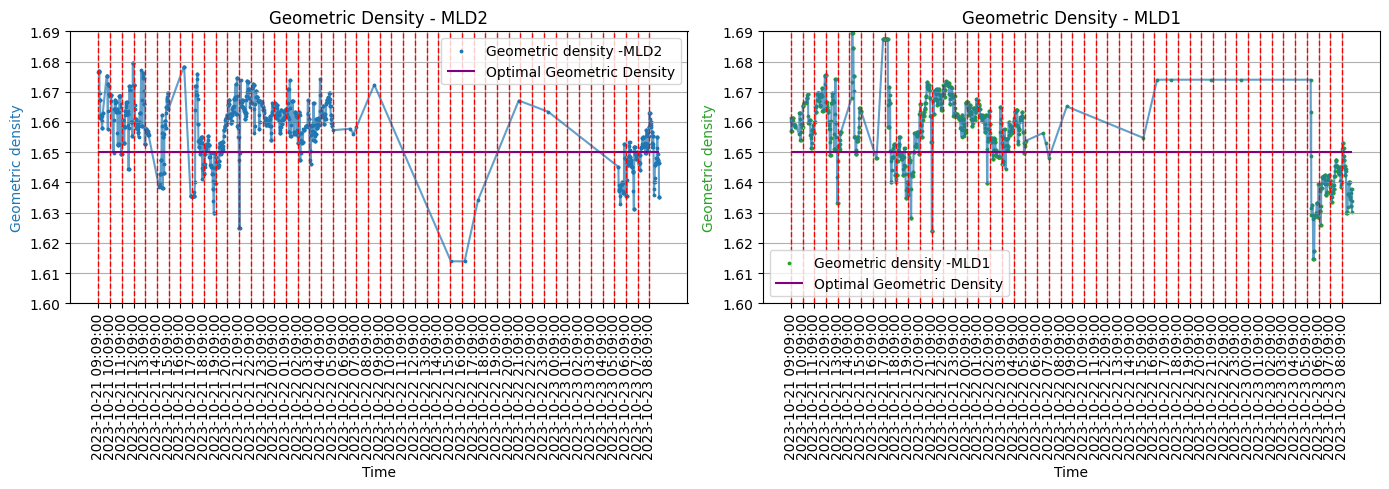

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered['time'] is already a datetime or timestamp series
df_filtered['time'] = pd.to_datetime(df_filtered['time'])

# Create a figure and a 1x2 subplot grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot on the first subplot
ax1.scatter(df_filtered['time'], df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'], label='Geometric density -MLD2', color='tab:blue', s=3)
ax1.plot(df_filtered['time'], df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'], color='tab:blue', linestyle='-', marker='', alpha=0.7)
threshold = 1.65  # Set your threshold value here
ax1.hlines(threshold, df_filtered['time'].min(), df_filtered['time'].max(), color='purple', linestyles='solid', label='Optimal Geometric Density')
ax1.set_xlabel('Time')
ax1.set_ylabel('Geometric density', color='tab:blue')
ax1.set_title('Geometric Density - MLD2')

# Plot on the second subplot
ax2.scatter(df_filtered['time'], df_filtered['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'], label='Geometric density -MLD1', color='tab:green', s=3)
ax2.plot(df_filtered['time'], df_filtered['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'], color='tab:blue', linestyle='-', marker='', alpha=0.7)
threshold = 1.65  # Set your threshold value here
ax2.hlines(threshold, df_filtered['time'].min(), df_filtered['time'].max(), color='purple', linestyles='solid', label='Optimal Geometric Density')
ax2.set_xlabel('Time')
ax2.set_ylabel('Geometric density', color='tab:green')
ax2.set_title('Geometric Density - MLD1')

# Customize x-axis ticks as hourly intervals for both subplots
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')
ax1.set_xticks(hourly_intervals)
ax1.set_xticklabels(hourly_intervals, rotation=90)
ax2.set_xticks(hourly_intervals)
ax2.set_xticklabels(hourly_intervals, rotation=90)

ax1.set_ylim(1.60, 1.69)
ax2.set_ylim(1.60, 1.69)

# Add a grid to both subplots
ax1.grid(True)
ax2.grid(True)

ax1.legend()
ax2.legend()

# Add vertical lines for each hour to both subplots
for interval in hourly_intervals:
    ax1.axvline(interval, color='red', linestyle='--', linewidth=1)
    ax2.axvline(interval, color='red', linestyle='--', linewidth=1)

plt.tight_layout()  # To ensure subplots don't overlap
plt.show()


In [114]:
# Geometric density From mould-1
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

hourly_std_dev = []
for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]
    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'][mask]
    std_dev = data_subset.std()
    from_time = start_time.strftime('%Y-%m-%d %H:%M:%S')
    to_time = end_time.strftime('%Y-%m-%d %H:%M:%S')
    hourly_std_dev.append((from_time,to_time,std_dev))

for i, (from_time, to_time, std_dev) in enumerate(hourly_std_dev):
    print(f'Standard Deviation of Geometric density from mould-1:{from_time} to {to_time}: {std_dev:.4f}')

Standard Deviation of Geometric density from mould-1:2023-10-21 09:09:00 to 2023-10-21 10:09:00: 0.0023
Standard Deviation of Geometric density from mould-1:2023-10-21 10:09:00 to 2023-10-21 11:09:00: 0.0053
Standard Deviation of Geometric density from mould-1:2023-10-21 11:09:00 to 2023-10-21 12:09:00: 0.0040
Standard Deviation of Geometric density from mould-1:2023-10-21 12:09:00 to 2023-10-21 13:09:00: 0.0093
Standard Deviation of Geometric density from mould-1:2023-10-21 13:09:00 to 2023-10-21 14:09:00: 0.0054
Standard Deviation of Geometric density from mould-1:2023-10-21 14:09:00 to 2023-10-21 15:09:00: 0.0125
Standard Deviation of Geometric density from mould-1:2023-10-21 15:09:00 to 2023-10-21 16:09:00: nan
Standard Deviation of Geometric density from mould-1:2023-10-21 16:09:00 to 2023-10-21 17:09:00: 0.0183
Standard Deviation of Geometric density from mould-1:2023-10-21 17:09:00 to 2023-10-21 18:09:00: 0.0176
Standard Deviation of Geometric density from mould-1:2023-10-21 18:

In [115]:
# Geometric density from mould-2


In [117]:
data_subset.values

array([1.65371])

In [120]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

hourly_std_dev = []

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]
    
    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')
    
    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]
    
    specific_number = 1.65
    data = data_subset.values
    
    z_scores = (data - specific_number) / np.std(data)
    
    from_time = start_time.strftime('%Y-%m-%d %H:%M:%S')
    to_time = end_time.strftime('%Y-%m-%d %H:%M:%S')
    
    # Calculate and store the standard deviation of the data within the interval
    std_dev = np.std(data)
    hourly_std_dev.append((from_time, to_time, std_dev))
    
    negative_anode = 0
    
    for k, value in enumerate(data):
        if len(z_scores) > 0:
            print(f'Data Point {k+1}: {value:.4f} is {z_scores[k]:.3f} standard deviations from {specific_number}.')
        if z_scores[k] < -0.55:
            negative_anode += 1
        if negative_anode > 15:
            print("negative z_scores")
            negative_anode = 0
            
    threshold = 0.006
    within_range = z_scores <= threshold
    
    print("Data points within 1 standard deviation from the specific number:")
    print(data[within_range])
    print("\n")

Standard Deviation of Geometric density from mould-1:2023-10-21 09:09:00 to 2023-10-21 10:09:00:
Data Point 1: 1.6766 is 4.135 standard deviations from 1.65.
Data Point 2: 1.6766 is 4.135 standard deviations from 1.65.
Data Point 3: 1.6766 is 4.135 standard deviations from 1.65.
Data Point 4: 1.6769 is 4.184 standard deviations from 1.65.
Data Point 5: 1.6770 is 4.200 standard deviations from 1.65.
Data Point 6: 1.6770 is 4.200 standard deviations from 1.65.
Data Point 7: 1.6697 is 3.066 standard deviations from 1.65.
Data Point 8: 1.6673 is 2.688 standard deviations from 1.65.
Data Point 9: 1.6673 is 2.688 standard deviations from 1.65.
Data Point 10: 1.6673 is 2.688 standard deviations from 1.65.
Data Point 11: 1.6614 is 1.770 standard deviations from 1.65.
Data Point 12: 1.6614 is 1.770 standard deviations from 1.65.
Data Point 13: 1.6614 is 1.770 standard deviations from 1.65.
Data Point 14: 1.6619 is 1.854 standard deviations from 1.65.
Data Point 15: 1.6624 is 1.937 standard devi

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


In [121]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

hourly_std_dev = []

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]
    
    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')
    
    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]
    
    specific_number = 1.65
    data = data_subset.values
    
    z_scores = (data - specific_number) / np.std(data)
    
    for k, value in enumerate(data):
        if len(z_scores) > 0:
            print(f'Data Point {k+1}: {value:.4f} is {z_scores[k]:.3f} standard deviations from {specific_number}.')
            
    threshold = -0.5
    within_range = z_scores <= threshold
    
    print("Data points with higher negative z_scores: ")
    print(data[within_range])
    print(within_range)
    print(len(within_range))

    print("\n")

Standard Deviation of Geometric density from mould-1:2023-10-21 09:09:00 to 2023-10-21 10:09:00:
Data Point 1: 1.6766 is 4.135 standard deviations from 1.65.
Data Point 2: 1.6766 is 4.135 standard deviations from 1.65.
Data Point 3: 1.6766 is 4.135 standard deviations from 1.65.
Data Point 4: 1.6769 is 4.184 standard deviations from 1.65.
Data Point 5: 1.6770 is 4.200 standard deviations from 1.65.
Data Point 6: 1.6770 is 4.200 standard deviations from 1.65.
Data Point 7: 1.6697 is 3.066 standard deviations from 1.65.
Data Point 8: 1.6673 is 2.688 standard deviations from 1.65.
Data Point 9: 1.6673 is 2.688 standard deviations from 1.65.
Data Point 10: 1.6673 is 2.688 standard deviations from 1.65.
Data Point 11: 1.6614 is 1.770 standard deviations from 1.65.
Data Point 12: 1.6614 is 1.770 standard deviations from 1.65.
Data Point 13: 1.6614 is 1.770 standard deviations from 1.65.
Data Point 14: 1.6619 is 1.854 standard deviations from 1.65.
Data Point 15: 1.6624 is 1.937 standard devi

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide


Standard Deviation of Geometric density from mould-1:2023-10-21 09:09:00 to 2023-10-21 10:09:00:
Data Point 1: 1.6766 is 4.135 standard deviations from 1.65.
Data Point 2: 1.6766 is 4.135 standard deviations from 1.65.
Data Point 3: 1.6766 is 4.135 standard deviations from 1.65.
Data Point 4: 1.6769 is 4.184 standard deviations from 1.65.
Data Point 5: 1.6770 is 4.200 standard deviations from 1.65.
Data Point 6: 1.6770 is 4.200 standard deviations from 1.65.
Data Point 7: 1.6697 is 3.066 standard deviations from 1.65.
Data Point 8: 1.6673 is 2.688 standard deviations from 1.65.
Data Point 9: 1.6673 is 2.688 standard deviations from 1.65.
Data Point 10: 1.6673 is 2.688 standard deviations from 1.65.
Data Point 11: 1.6614 is 1.770 standard deviations from 1.65.
Data Point 12: 1.6614 is 1.770 standard deviations from 1.65.
Data Point 13: 1.6614 is 1.770 standard deviations from 1.65.
Data Point 14: 1.6619 is 1.854 standard deviations from 1.65.
Data Point 15: 1.6624 is 1.937 standard devi

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


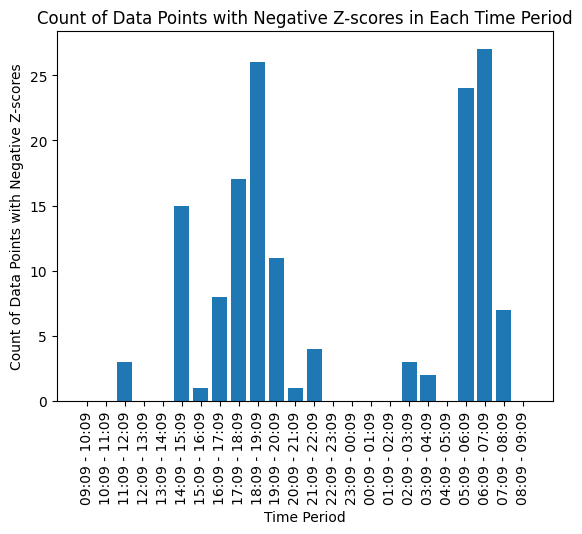

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

hourly_std_dev = []
negative_z_scores_count = []  # To store the count of data points with negative z-scores
time_periods = []  # To store the time periods for the x-axis

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)

    negative_z_scores = z_scores[z_scores < -0.5]  # Adjust the threshold as needed

    # Append the count of data points with negative z-scores for each interval
    negative_z_scores_count.append(len(negative_z_scores))
    
    # Append the time period to be displayed on the x-axis
    time_periods.append(f'{start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}')
    
    for k, value in enumerate(data):
        if len(z_scores) > 0:
            print(f'Data Point {k+1}: {value:.4f} is {z_scores[k]:.3f} standard deviations from {specific_number}.')

    print("Data points with higher negative z_scores: ")
    print(negative_z_scores)
    print(len(negative_z_scores))
    print("\n")

# Create a bar plot to show the count of data points with negative z-scores for each interval
plt.bar(time_periods, negative_z_scores_count)
plt.xlabel('Time Period')
plt.ylabel('Count of Data Points with Negative Z-scores')
plt.title('Count of Data Points with Negative Z-scores in Each Time Period')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

Standard Deviation of Geometric density from mould-1:2023-10-21 09:09:00 to 2023-10-21 10:09:00:


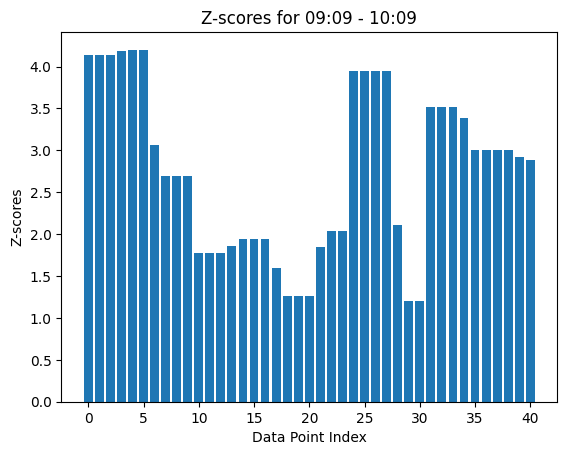

Standard Deviation of Geometric density from mould-1:2023-10-21 10:09:00 to 2023-10-21 11:09:00:


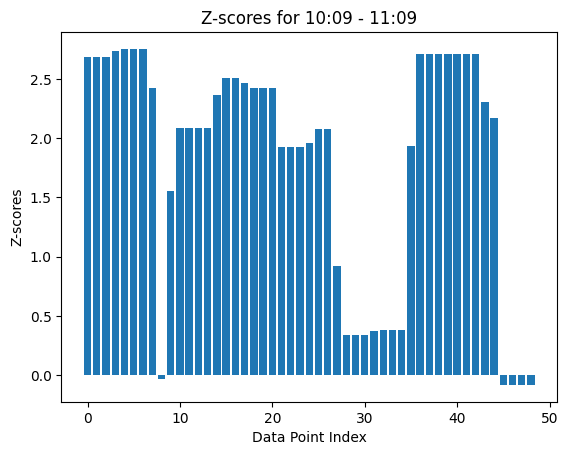

Standard Deviation of Geometric density from mould-1:2023-10-21 11:09:00 to 2023-10-21 12:09:00:


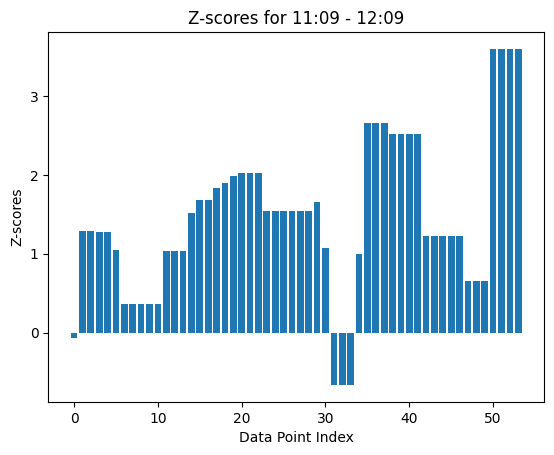

Standard Deviation of Geometric density from mould-1:2023-10-21 12:09:00 to 2023-10-21 13:09:00:


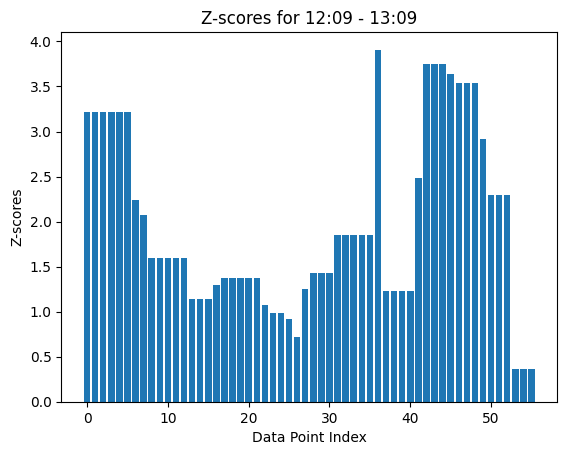

Standard Deviation of Geometric density from mould-1:2023-10-21 13:09:00 to 2023-10-21 14:09:00:


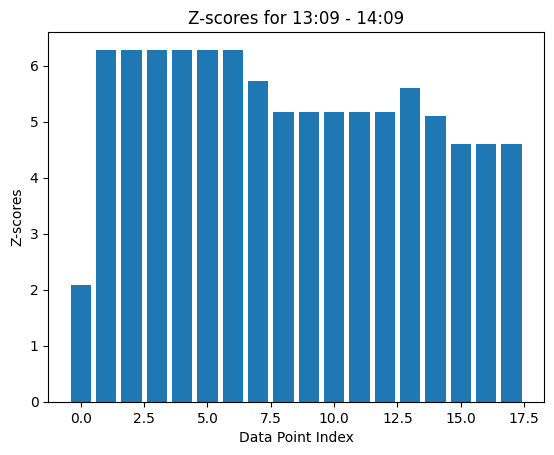

Standard Deviation of Geometric density from mould-1:2023-10-21 14:09:00 to 2023-10-21 15:09:00:


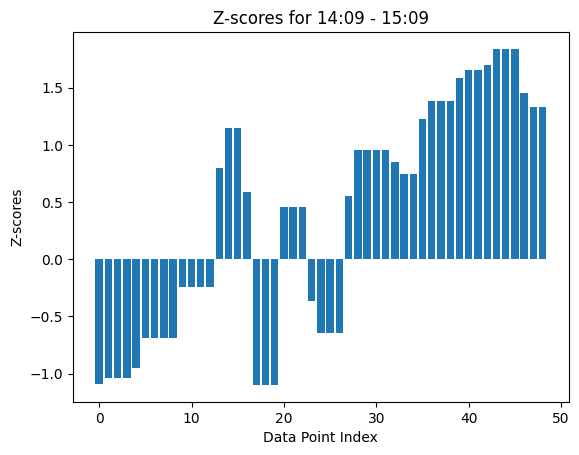

Standard Deviation of Geometric density from mould-1:2023-10-21 15:09:00 to 2023-10-21 16:09:00:


c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


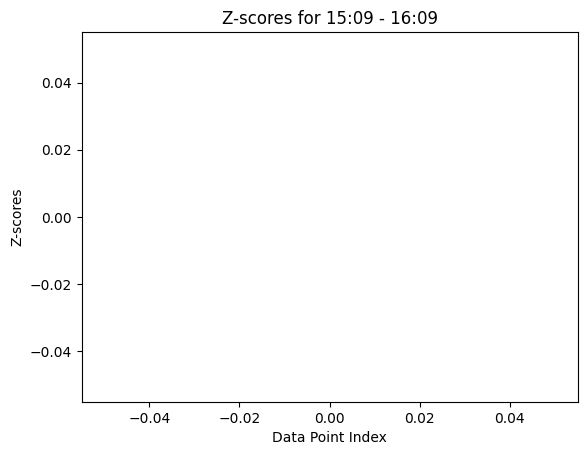

Standard Deviation of Geometric density from mould-1:2023-10-21 16:09:00 to 2023-10-21 17:09:00:


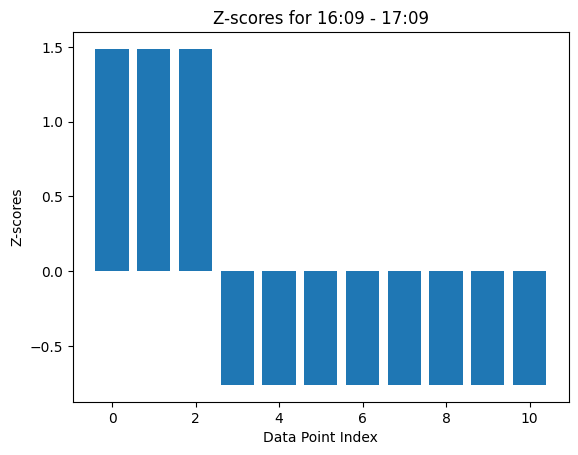

Standard Deviation of Geometric density from mould-1:2023-10-21 17:09:00 to 2023-10-21 18:09:00:


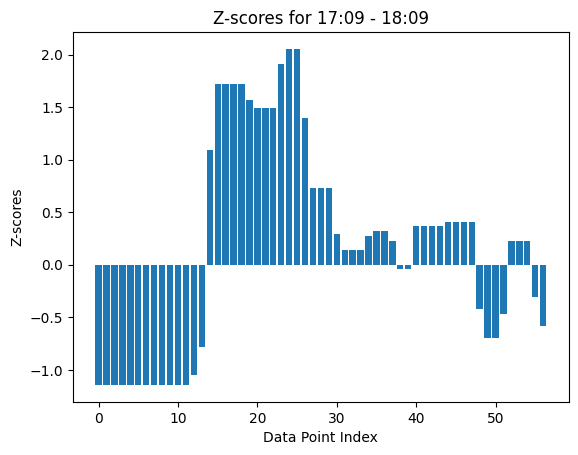

Standard Deviation of Geometric density from mould-1:2023-10-21 18:09:00 to 2023-10-21 19:09:00:


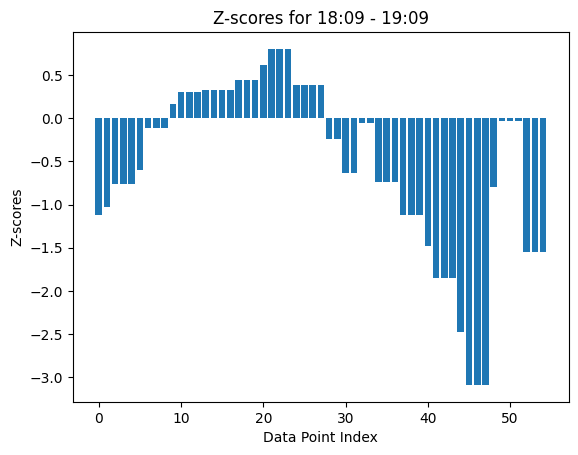

Standard Deviation of Geometric density from mould-1:2023-10-21 19:09:00 to 2023-10-21 20:09:00:


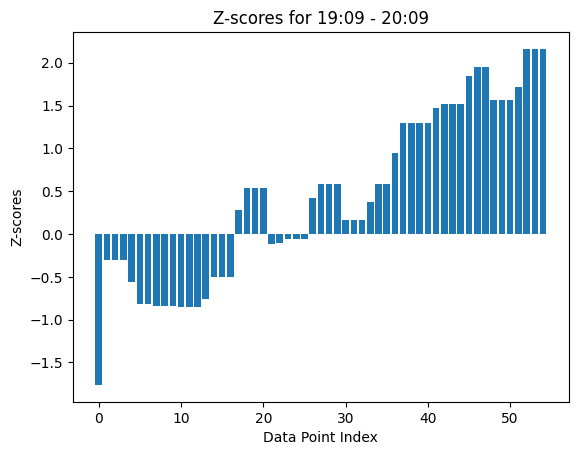

Standard Deviation of Geometric density from mould-1:2023-10-21 20:09:00 to 2023-10-21 21:09:00:


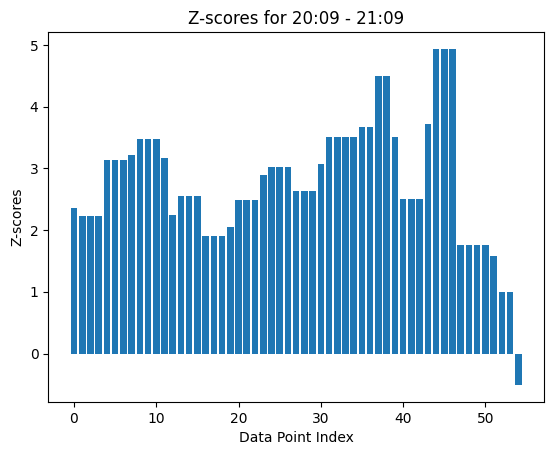

Standard Deviation of Geometric density from mould-1:2023-10-21 21:09:00 to 2023-10-21 22:09:00:


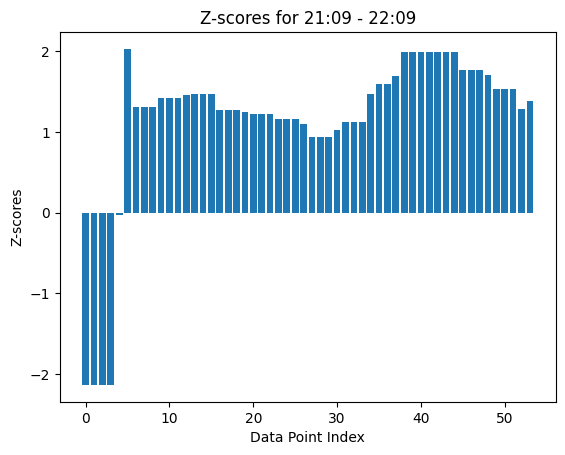

Standard Deviation of Geometric density from mould-1:2023-10-21 22:09:00 to 2023-10-21 23:09:00:


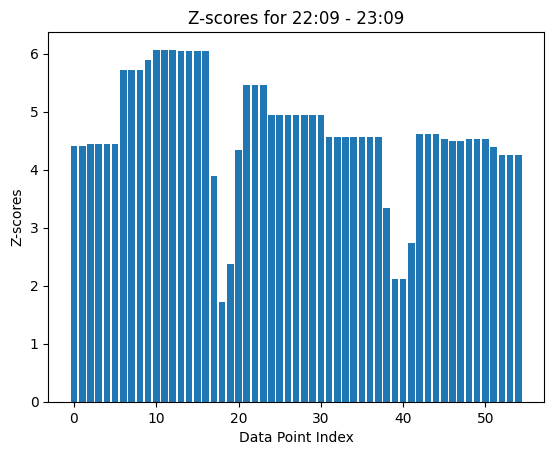

Standard Deviation of Geometric density from mould-1:2023-10-21 23:09:00 to 2023-10-22 00:09:00:


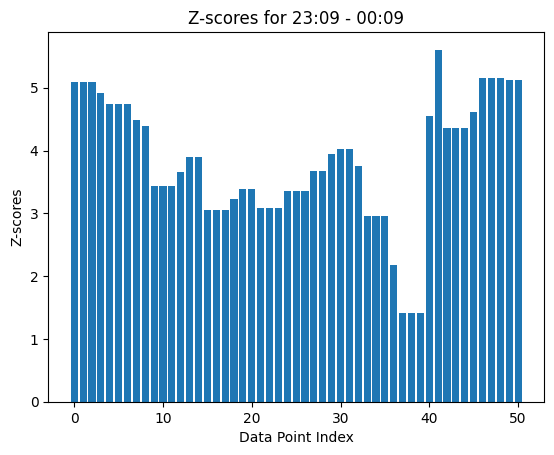

Standard Deviation of Geometric density from mould-1:2023-10-22 00:09:00 to 2023-10-22 01:09:00:


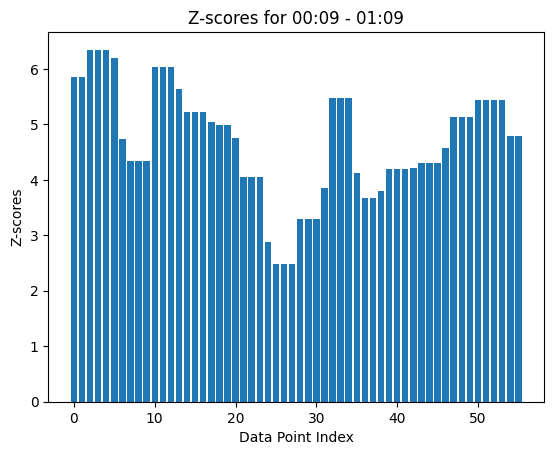

Standard Deviation of Geometric density from mould-1:2023-10-22 01:09:00 to 2023-10-22 02:09:00:


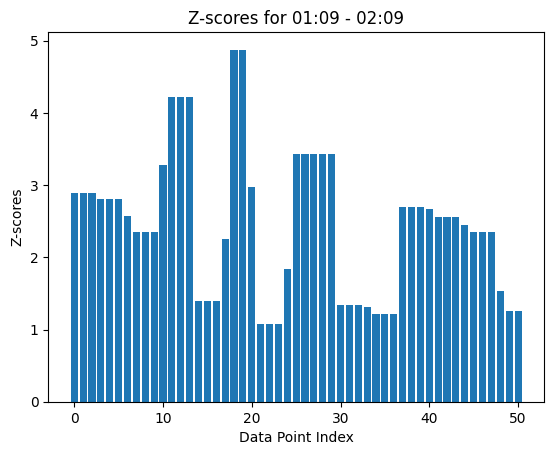

Standard Deviation of Geometric density from mould-1:2023-10-22 02:09:00 to 2023-10-22 03:09:00:


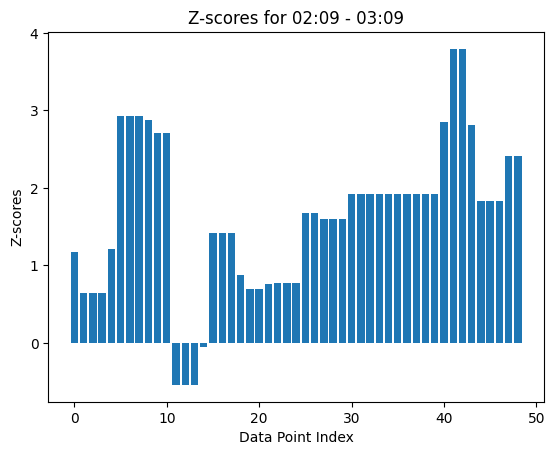

Standard Deviation of Geometric density from mould-1:2023-10-22 03:09:00 to 2023-10-22 04:09:00:


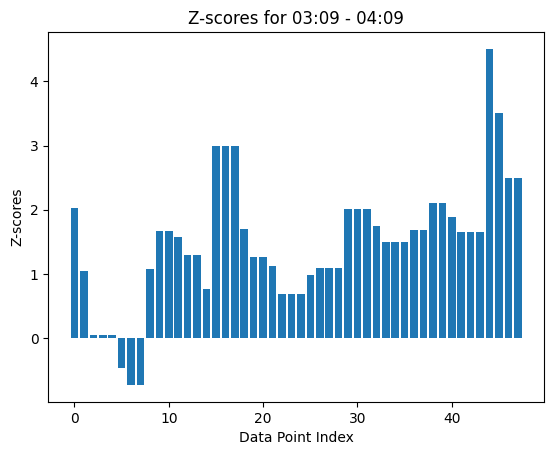

Standard Deviation of Geometric density from mould-1:2023-10-22 04:09:00 to 2023-10-22 05:09:00:


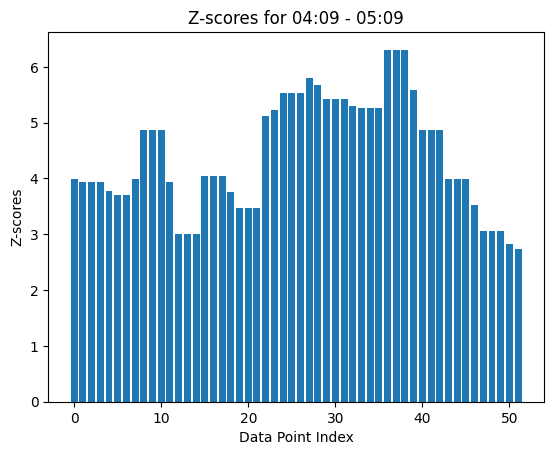

Standard Deviation of Geometric density from mould-1:2023-10-22 05:09:00 to 2023-10-22 06:09:00:


c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


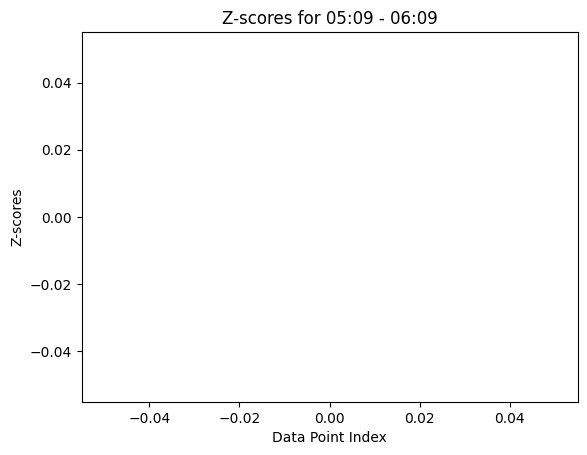

Standard Deviation of Geometric density from mould-1:2023-10-22 06:09:00 to 2023-10-22 07:09:00:


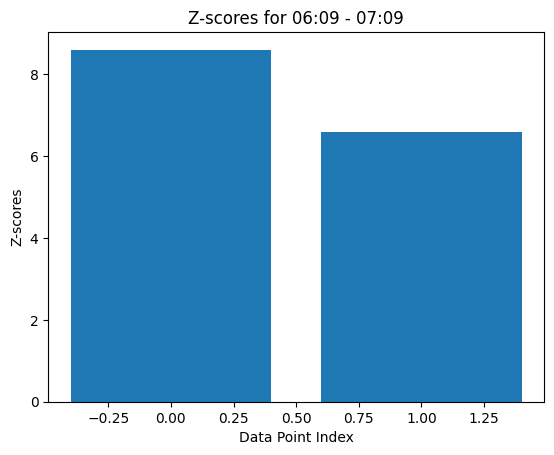

Standard Deviation of Geometric density from mould-1:2023-10-22 07:09:00 to 2023-10-22 08:09:00:


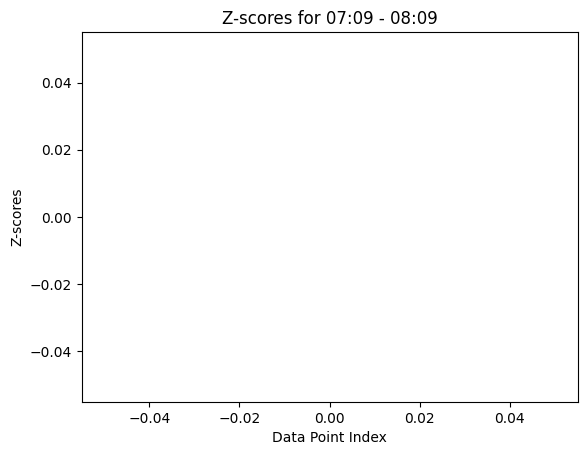

Standard Deviation of Geometric density from mould-1:2023-10-22 08:09:00 to 2023-10-22 09:09:00:


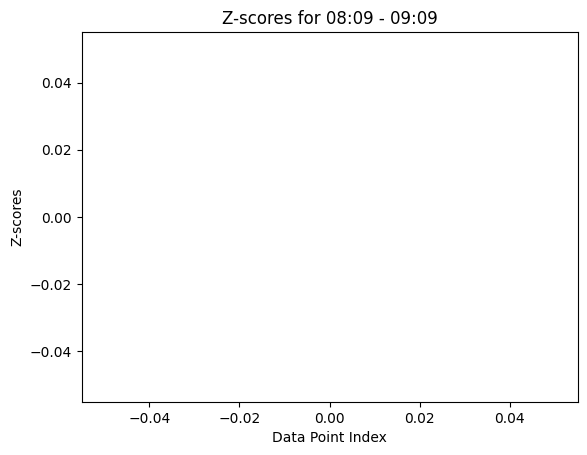

Standard Deviation of Geometric density from mould-1:2023-10-22 09:09:00 to 2023-10-22 10:09:00:


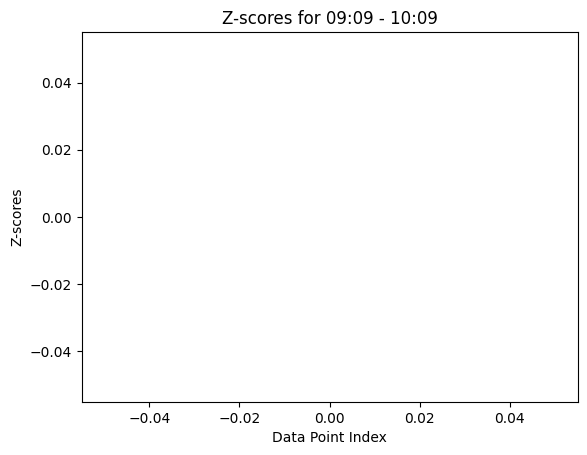

Standard Deviation of Geometric density from mould-1:2023-10-22 10:09:00 to 2023-10-22 11:09:00:


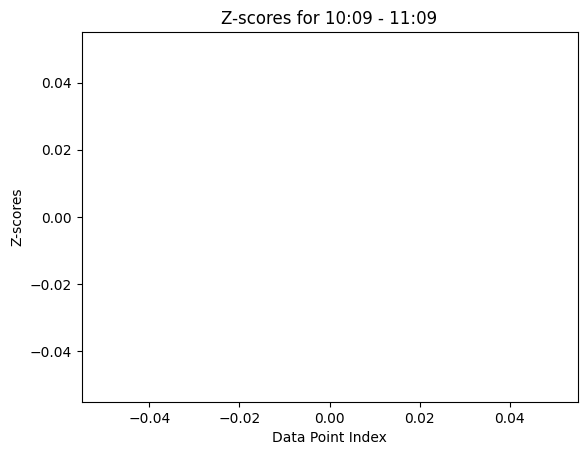

Standard Deviation of Geometric density from mould-1:2023-10-22 11:09:00 to 2023-10-22 12:09:00:


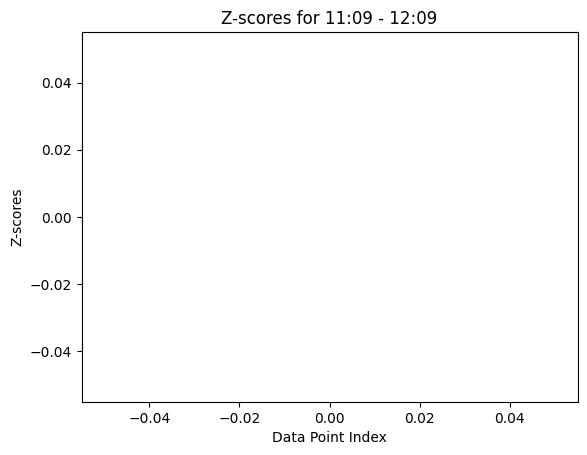

Standard Deviation of Geometric density from mould-1:2023-10-22 12:09:00 to 2023-10-22 13:09:00:


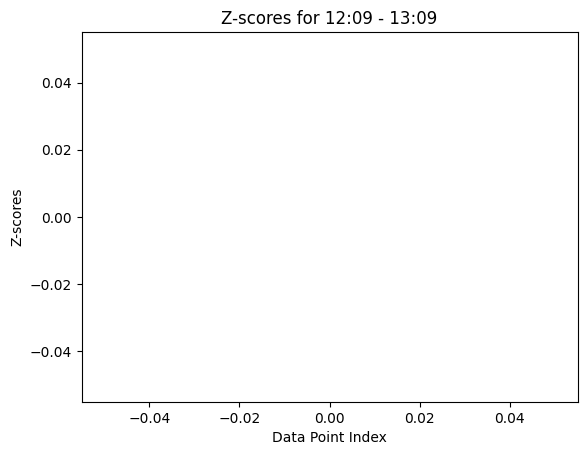

Standard Deviation of Geometric density from mould-1:2023-10-22 13:09:00 to 2023-10-22 14:09:00:


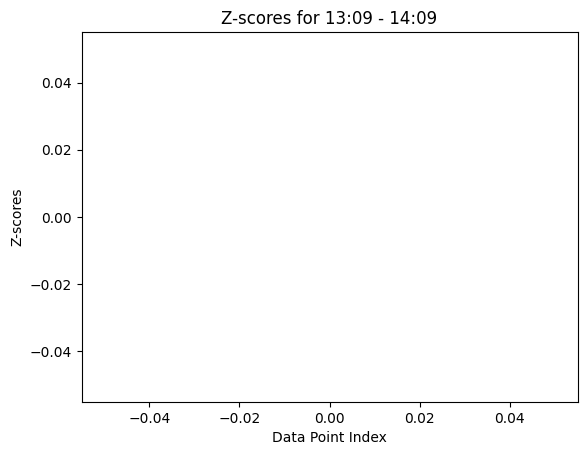

Standard Deviation of Geometric density from mould-1:2023-10-22 14:09:00 to 2023-10-22 15:09:00:


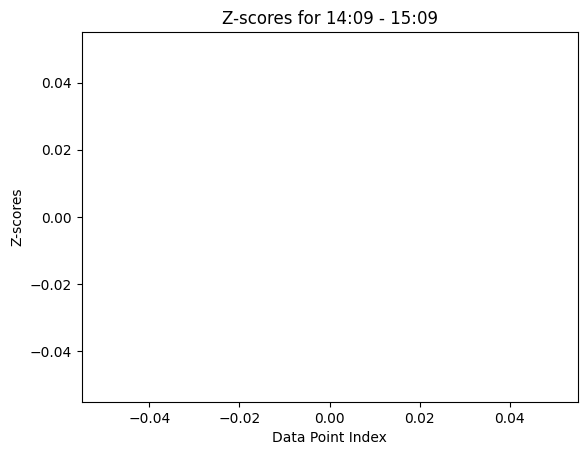

Standard Deviation of Geometric density from mould-1:2023-10-22 15:09:00 to 2023-10-22 16:09:00:


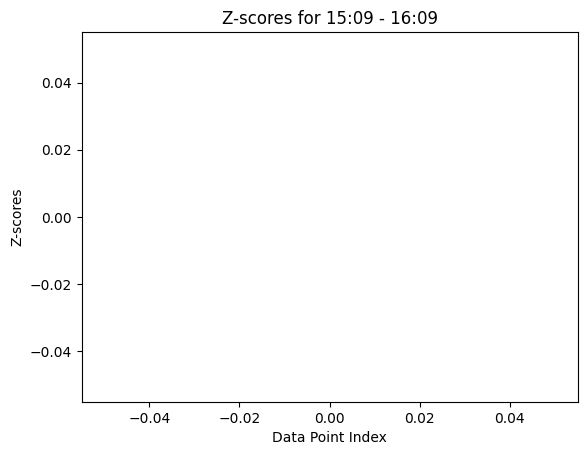

Standard Deviation of Geometric density from mould-1:2023-10-22 16:09:00 to 2023-10-22 17:09:00:


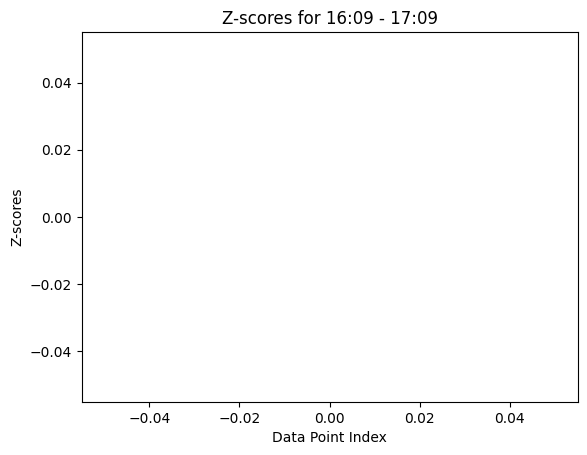

Standard Deviation of Geometric density from mould-1:2023-10-22 17:09:00 to 2023-10-22 18:09:00:


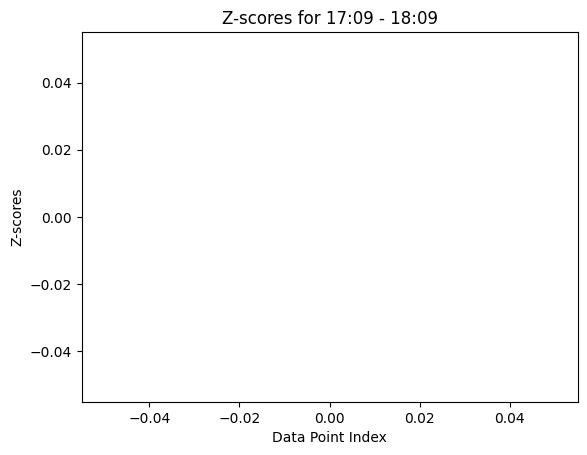

Standard Deviation of Geometric density from mould-1:2023-10-22 18:09:00 to 2023-10-22 19:09:00:


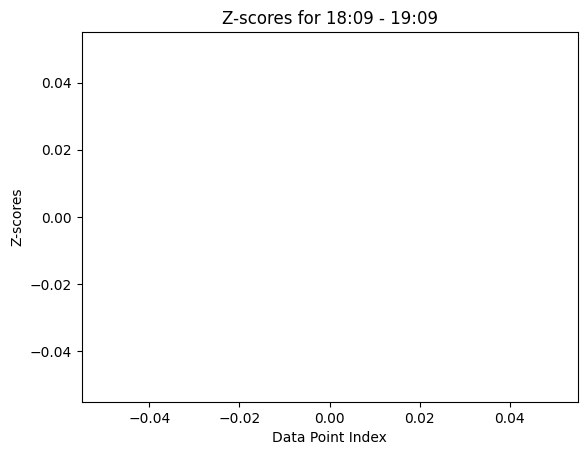

Standard Deviation of Geometric density from mould-1:2023-10-22 19:09:00 to 2023-10-22 20:09:00:


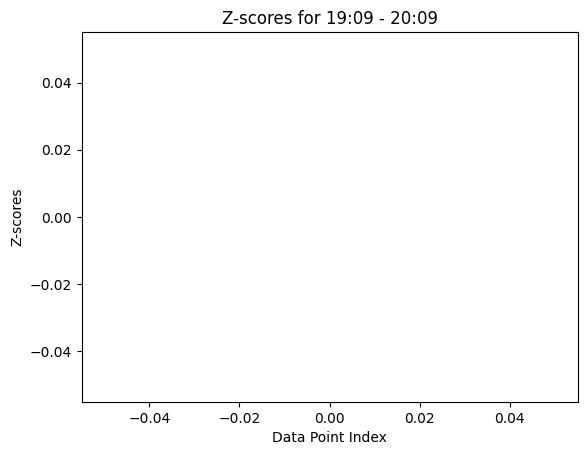

Standard Deviation of Geometric density from mould-1:2023-10-22 20:09:00 to 2023-10-22 21:09:00:


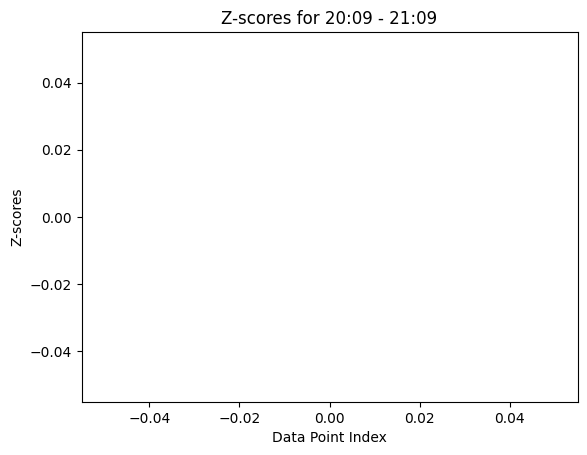

Standard Deviation of Geometric density from mould-1:2023-10-22 21:09:00 to 2023-10-22 22:09:00:


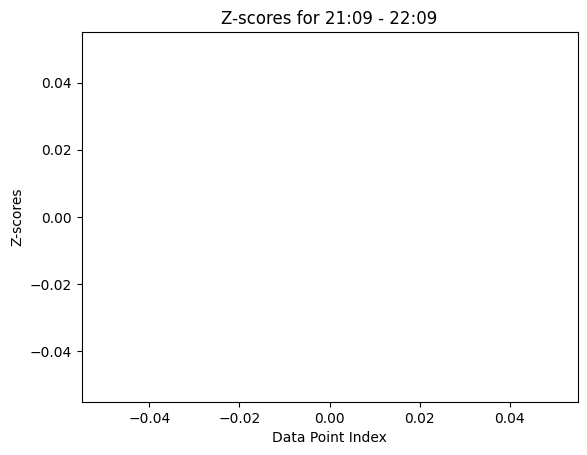

Standard Deviation of Geometric density from mould-1:2023-10-22 22:09:00 to 2023-10-22 23:09:00:


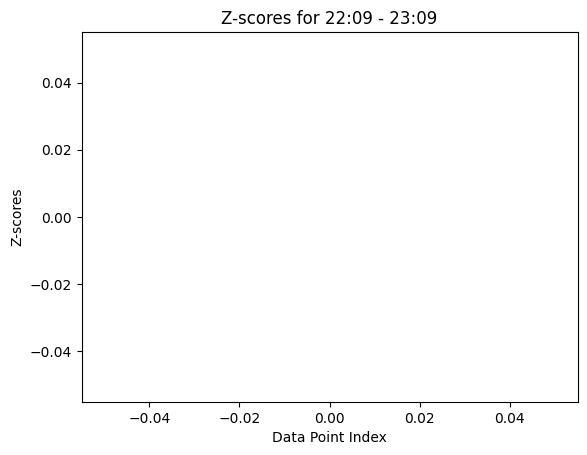

Standard Deviation of Geometric density from mould-1:2023-10-22 23:09:00 to 2023-10-23 00:09:00:


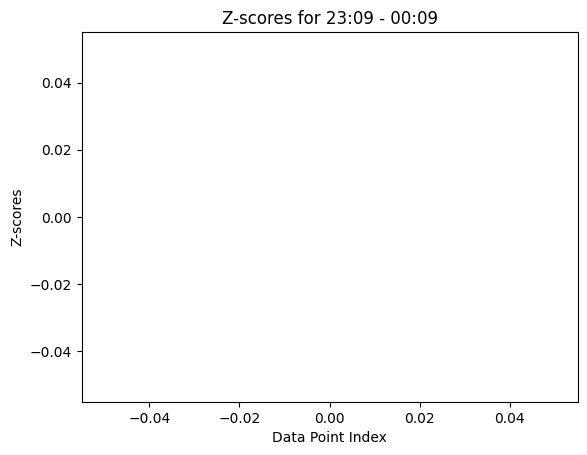

Standard Deviation of Geometric density from mould-1:2023-10-23 00:09:00 to 2023-10-23 01:09:00:


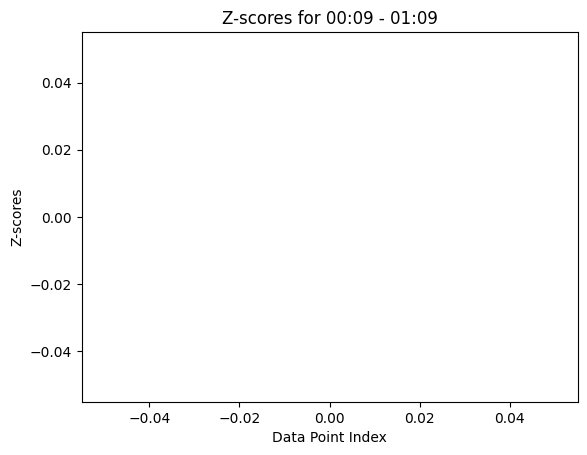

Standard Deviation of Geometric density from mould-1:2023-10-23 01:09:00 to 2023-10-23 02:09:00:


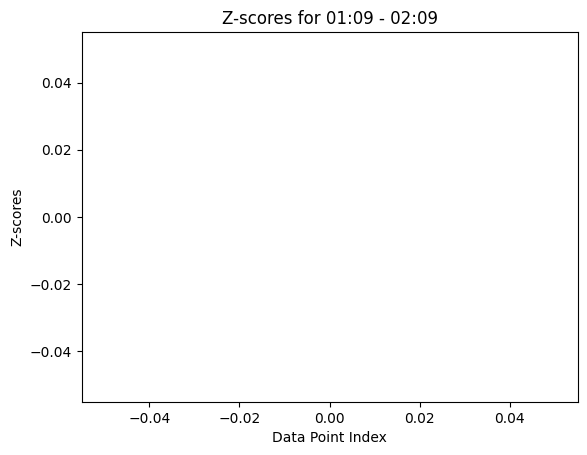

Standard Deviation of Geometric density from mould-1:2023-10-23 02:09:00 to 2023-10-23 03:09:00:


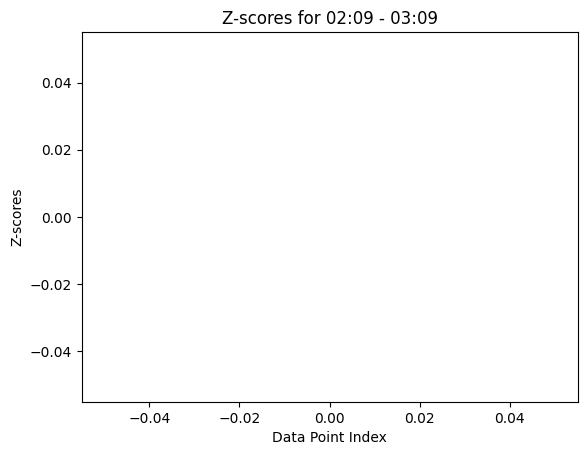

Standard Deviation of Geometric density from mould-1:2023-10-23 03:09:00 to 2023-10-23 04:09:00:


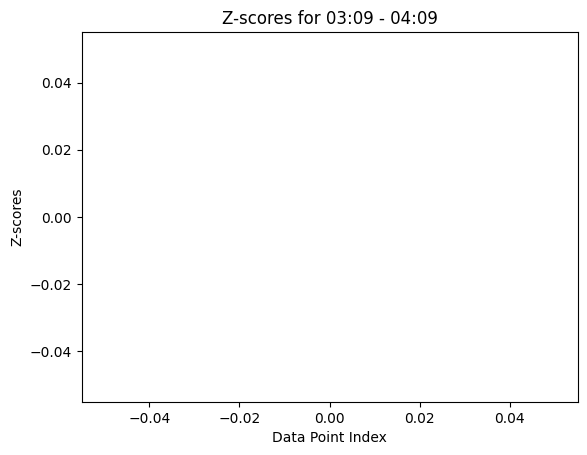

Standard Deviation of Geometric density from mould-1:2023-10-23 04:09:00 to 2023-10-23 05:09:00:


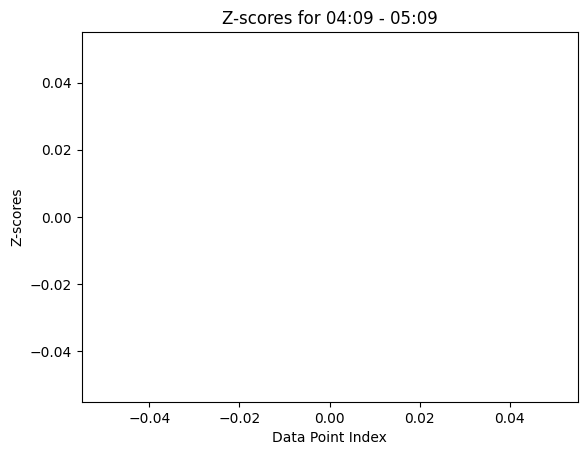

Standard Deviation of Geometric density from mould-1:2023-10-23 05:09:00 to 2023-10-23 06:09:00:


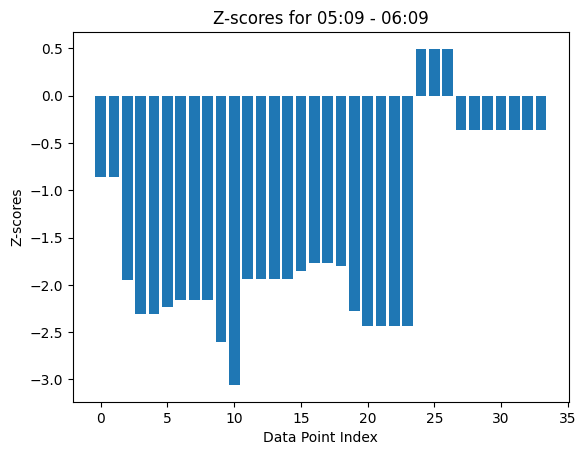

Standard Deviation of Geometric density from mould-1:2023-10-23 06:09:00 to 2023-10-23 07:09:00:


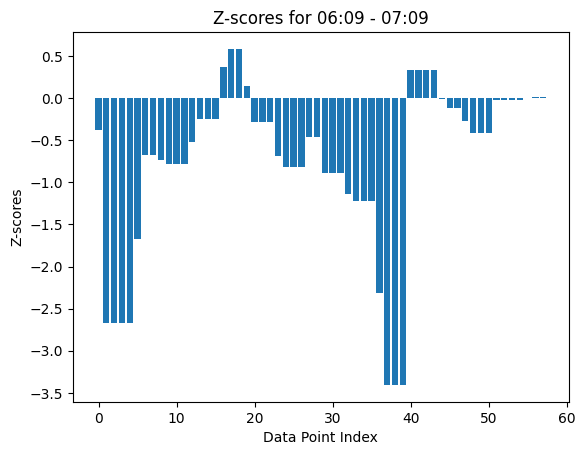

Standard Deviation of Geometric density from mould-1:2023-10-23 07:09:00 to 2023-10-23 08:09:00:


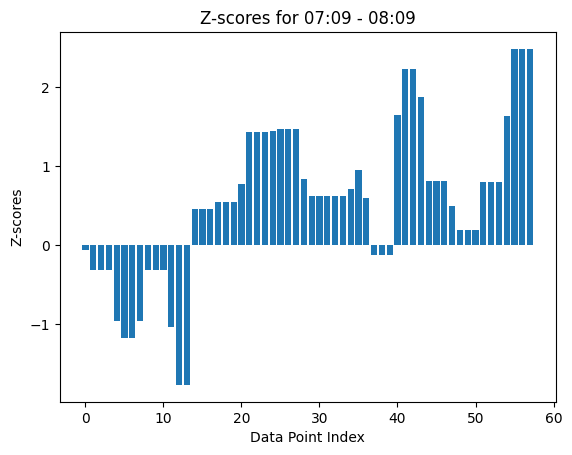

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)
    
    # Create a bar plot for z-scores
    plt.bar(range(len(z_scores)), z_scores)
    
    plt.xlabel('Data Point Index')
    plt.ylabel('Z-scores')
    plt.title(f'Z-scores for {start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}')
    plt.show()

Standard Deviation of Geometric density from mould-1:2023-10-21 09:09:00 to 2023-10-21 10:09:00:
Data Point 1: 1.6766 is 4.135 standard deviations from 1.65.
Data Point 2: 1.6766 is 4.135 standard deviations from 1.65.
Data Point 3: 1.6766 is 4.135 standard deviations from 1.65.
Data Point 4: 1.6769 is 4.184 standard deviations from 1.65.
Data Point 5: 1.6770 is 4.200 standard deviations from 1.65.
Data Point 6: 1.6770 is 4.200 standard deviations from 1.65.
Data Point 7: 1.6697 is 3.066 standard deviations from 1.65.
Data Point 8: 1.6673 is 2.688 standard deviations from 1.65.
Data Point 9: 1.6673 is 2.688 standard deviations from 1.65.
Data Point 10: 1.6673 is 2.688 standard deviations from 1.65.
Data Point 11: 1.6614 is 1.770 standard deviations from 1.65.
Data Point 12: 1.6614 is 1.770 standard deviations from 1.65.
Data Point 13: 1.6614 is 1.770 standard deviations from 1.65.
Data Point 14: 1.6619 is 1.854 standard deviations from 1.65.
Data Point 15: 1.6624 is 1.937 standard devi

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


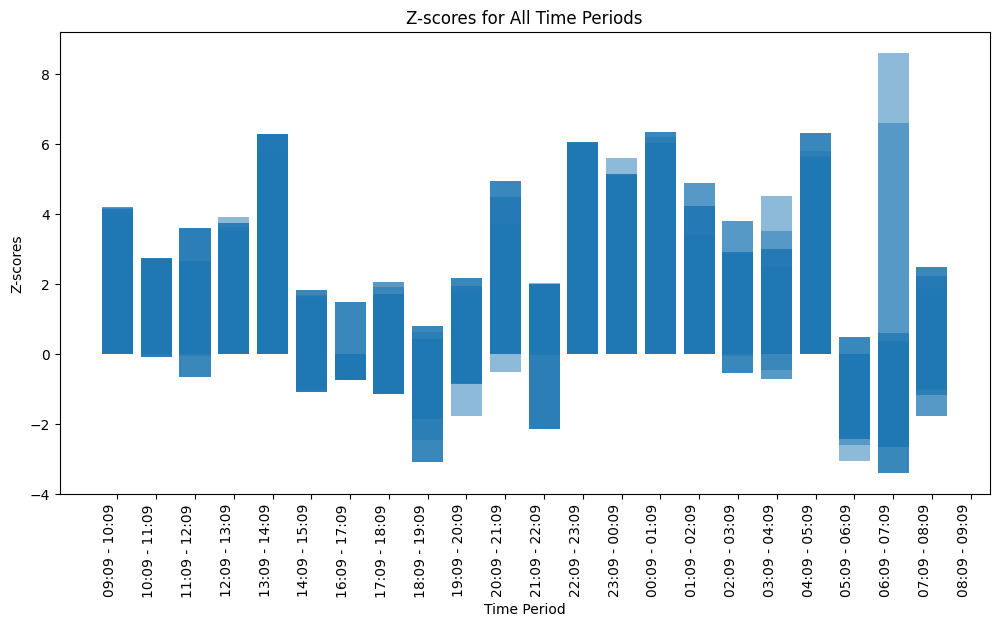

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

all_z_scores = []  # To store all z-scores for each time period
time_periods = []  # To store the corresponding time periods

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)
    
    # Append z-scores for this time period
    all_z_scores.extend(z_scores)
    
    # Append the time period labels for each z-score in this period
    time_periods.extend([f'{start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}' for _ in z_scores])

    for k, value in enumerate(data):
        if len(z_scores) > 0:
            print(f'Data Point {k+1}: {value:.4f} is {z_scores[k]:.3f} standard deviations from {specific_number}.')

    print("Data points with z_scores: ")
    print(z_scores)
    print("\n")

# Create a single bar plot for all time periods and their z-score values
plt.figure(figsize=(12, 6))
plt.bar(time_periods, all_z_scores, align='center', alpha=0.5)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Time Period')
plt.ylabel('Z-scores')
plt.title('Z-scores for All Time Periods')
plt.show()

Standard Deviation of Geometric density from mould-1:2023-10-21 09:09:00 to 2023-10-21 10:09:00:
Data Point 1: 1.6766 is 4.135 standard deviations from 1.65.
Data Point 2: 1.6766 is 4.135 standard deviations from 1.65.
Data Point 3: 1.6766 is 4.135 standard deviations from 1.65.
Data Point 4: 1.6769 is 4.184 standard deviations from 1.65.
Data Point 5: 1.6770 is 4.200 standard deviations from 1.65.
Data Point 6: 1.6770 is 4.200 standard deviations from 1.65.
Data Point 7: 1.6697 is 3.066 standard deviations from 1.65.
Data Point 8: 1.6673 is 2.688 standard deviations from 1.65.
Data Point 9: 1.6673 is 2.688 standard deviations from 1.65.
Data Point 10: 1.6673 is 2.688 standard deviations from 1.65.
Data Point 11: 1.6614 is 1.770 standard deviations from 1.65.
Data Point 12: 1.6614 is 1.770 standard deviations from 1.65.
Data Point 13: 1.6614 is 1.770 standard deviations from 1.65.
Data Point 14: 1.6619 is 1.854 standard deviations from 1.65.
Data Point 15: 1.6624 is 1.937 standard devi

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


AttributeError: 'Rectangle' object has no property 'bin'

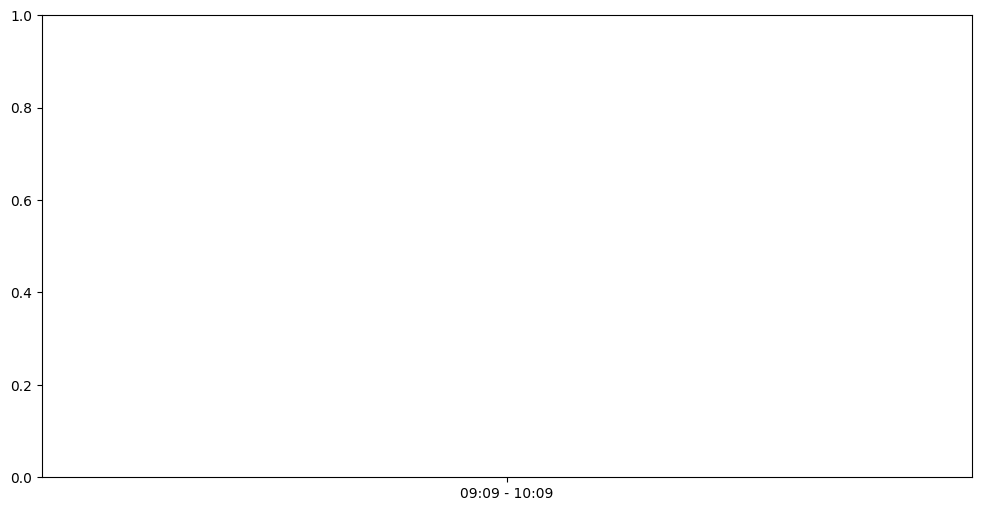

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

all_z_scores = []  # To store all z-scores for each time period
time_periods = []  # To store the corresponding time periods

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)
    
    # Append z-scores for this time period
    all_z_scores.extend(z_scores)
    
    # Append the time period labels for each z-score in this period
    time_periods.extend([f'{start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}' for _ in z_scores])

    for k, value in enumerate(data):
        if len(z_scores) > 0:
            print(f'Data Point {k+1}: {value:.4f} is {z_scores[k]:.3f} standard deviations from {specific_number}.')

    print("Data points with z_scores: ")
    print(z_scores)
    print("\n")

# Create a single bar plot for all time periods and their z-score values
plt.figure(figsize=(12, 6))
plt.bar(time_periods, all_z_scores, align='center', alpha=0.5, bin=20)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Time Period')
plt.ylabel('Z-scores')
plt.title('Z-scores for All Time Periods')

# Add horizontal line at z-score equal to 0
plt.axhline(y=0, color='red', linestyle='--', label='Z-score = 0')
plt.legend()

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)
    
    # Create a bar for each value of z_scores
    plt.figure(figsize=(8, 4))
    plt.bar(range(len(z_scores)), z_scores, align='center', alpha=0.5)
    plt.xticks(range(len(z_scores)), [f'Data Point {k+1}' for k in range(len(z_scores))], rotation=45)
    plt.xlabel('Data Point')
    plt.ylabel('Z-scores')
    plt.title(f'Z-scores for {start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}')
    plt.axhline(y=0, color='red', linestyle='--', label='Z-score = 0')
    plt.legend()
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

all_z_scores = []  # To store all z-scores for each time period
time_periods = []  # To store the corresponding time periods

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)
    
    # Append z-scores for this time period
    all_z_scores.extend(z_scores)
    
    # Append the time period labels for each z-score in this period
    time_periods.extend([f'{start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}' for _ in z_scores])

    for k, value in enumerate(data):
        if len(z_scores) > 0:
            print(f'Data Point {k+1}: {value:.4f} is {z_scores[k]:.3f} standard deviations from {specific_number}.')

    print("Data points with z_scores: ")
    print(z_scores)
    print("\n")

# Create a single scatter plot for all time periods and their z-score values
plt.figure(figsize=(12, 6))
plt.scatter(time_periods, all_z_scores, alpha=0.5)
plt.xticks(rotation=90, ha='right')
plt.xlabel('Time Period')
plt.ylabel('Z-scores')
plt.title('Z-scores for All Time Periods')
plt.grid(True)
plt.show()

In [126]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

hourly_std_dev = []

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)

    # Find times when z_scores are below the threshold
    threshold = -0.5
    below_threshold_times = df_filtered['time'][mask][z_scores <= threshold]
    
    for time, value in zip(below_threshold_times, data[z_scores <= threshold]):
        print(f'Time: {time}, Value: {value:.4f} is below the threshold (Z-score = {threshold})')

    print("\n")

Standard Deviation of Geometric density from mould-1:2023-10-21 09:09:00 to 2023-10-21 10:09:00:


Standard Deviation of Geometric density from mould-1:2023-10-21 10:09:00 to 2023-10-21 11:09:00:


Standard Deviation of Geometric density from mould-1:2023-10-21 11:09:00 to 2023-10-21 12:09:00:
Time: 2023-10-21 11:43:00, Value: 1.6445 is below the threshold (Z-score = -0.5)
Time: 2023-10-21 11:44:00, Value: 1.6445 is below the threshold (Z-score = -0.5)
Time: 2023-10-21 11:45:00, Value: 1.6445 is below the threshold (Z-score = -0.5)


Standard Deviation of Geometric density from mould-1:2023-10-21 12:09:00 to 2023-10-21 13:09:00:


Standard Deviation of Geometric density from mould-1:2023-10-21 13:09:00 to 2023-10-21 14:09:00:


Standard Deviation of Geometric density from mould-1:2023-10-21 14:09:00 to 2023-10-21 15:09:00:
Time: 2023-10-21 14:20:00, Value: 1.6383 is below the threshold (Z-score = -0.5)
Time: 2023-10-21 14:21:00, Value: 1.6389 is below the threshold (Z-score = -0.5)
Tim

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encoun

Standard Deviation of Geometric density from mould-1:2023-10-21 09:09:00 to 2023-10-21 10:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 10:09:00 to 2023-10-21 11:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 11:09:00 to 2023-10-21 12:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 12:09:00 to 2023-10-21 13:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 13:09:00 to 2023-10-21 14:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 14:09:00 to 2023-10-21 15:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 15:09:00 to 2023-10-21 16:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 16:09:00 to 2023-10-21 17:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 17:09:00 to 2023-10-21 18:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 18:09:00 to 2023-10-21 19:09:00:
Standard Deviation of Geometri

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:60: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


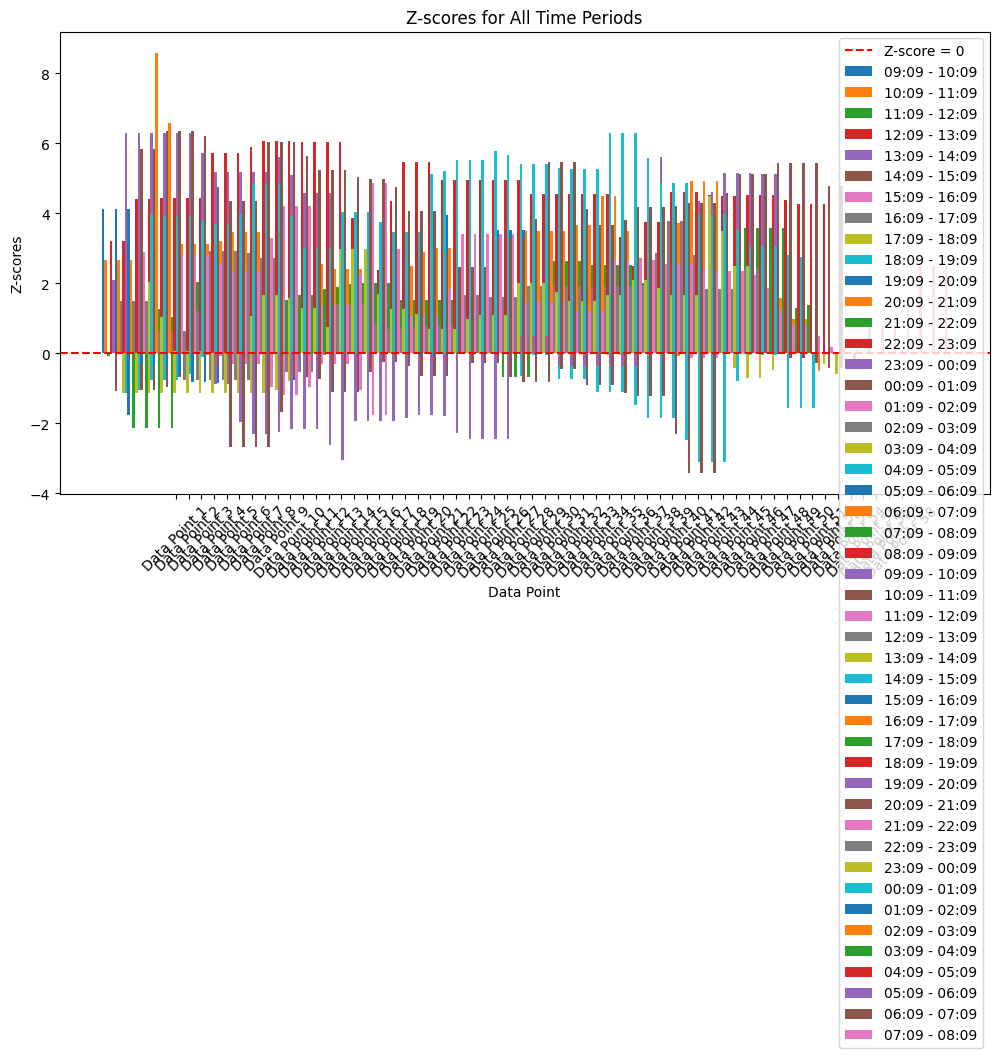

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

# Lists to store z_scores for each time period
all_z_scores = []
time_periods = []

# Find the maximum number of data points among all time periods
max_data_points = 0

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)
    
    # Store the z_scores and the time period
    all_z_scores.append(z_scores)
    time_periods.append(f'{start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}')

    # Update the maximum number of data points
    max_data_points = max(max_data_points, len(z_scores))

# Pad the z_scores arrays to have the same length (using NaN as a filler)
for i in range(len(all_z_scores)):
    if len(all_z_scores[i]) < max_data_points:
        all_z_scores[i] = np.append(all_z_scores[i], [np.nan] * (max_data_points - len(all_z_scores[i])))

# Create a single bar plot for all time periods
plt.figure(figsize=(12, 6))

# Determine the width of each bar to separate time periods
bar_width = 0.2
num_time_periods = len(time_periods)
bar_positions = np.arange(max_data_points)

# Create bars with different colors for each time period
for i in range(num_time_periods):
    plt.bar(bar_positions + i * bar_width, all_z_scores[i], width=bar_width, label=time_periods[i])

plt.xlabel('Data Point')
plt.ylabel('Z-scores')
plt.title('Z-scores for All Time Periods')
plt.axhline(y=0, color='red', linestyle='--', label='Z-score = 0')
plt.xticks(bar_positions + (bar_width * (max_data_points - 1)) / 2, [f'Data Point {k+1}' for k in range(max_data_points)], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [128]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

# Lists to store z_scores for each time period
all_z_scores = []
time_periods = []

# Find the maximum number of data points among all time periods
max_data_points = 0

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)
    
    # Store the z_scores and the time period
    all_z_scores.append(z_scores)
    time_periods.append(f'{start_time.strftime("%H:%M")} - {end_time.strftime("%H:%M")}')

    # Update the maximum number of data points
    max_data_points = max(max_data_points, len(z_scores))

# Pad the z_scores arrays to have the same length (using NaN as a filler)
for i in range(len(all_z_scores)):
    if len(all_z_scores[i]) < max_data_points:
        all_z_scores[i] = np.append(all_z_scores[i], [np.nan] * (max_data_points - len(all_z_scores[i])))

# Create a DataFrame with z_scores and time periods
z_scores_df = pd.DataFrame(all_z_scores, columns=[f'Data Point {k+1}' for k in range(max_data_points)], index=time_periods)

# Print the DataFrame
print(z_scores_df)

Standard Deviation of Geometric density from mould-1:2023-10-21 09:09:00 to 2023-10-21 10:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 10:09:00 to 2023-10-21 11:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 11:09:00 to 2023-10-21 12:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 12:09:00 to 2023-10-21 13:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 13:09:00 to 2023-10-21 14:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 14:09:00 to 2023-10-21 15:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 15:09:00 to 2023-10-21 16:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 16:09:00 to 2023-10-21 17:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 17:09:00 to 2023-10-21 18:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 18:09:00 to 2023-10-21 19:09:00:
Standard Deviation of Geometri

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


In [129]:
z_scores_df

Data Point 1  Data Point 2  Data Point 3  Data Point 4  \
09:09 - 10:09      4.134949      4.134949      4.134949      4.183952   
10:09 - 11:09      2.682493      2.682493      2.682493      2.736721   
11:09 - 12:09     -0.070562      1.290804      1.290804      1.277118   
12:09 - 13:09      3.216653      3.216653      3.216653      3.216653   
13:09 - 14:09      2.086440      6.283772      6.283772      6.283772   
14:09 - 15:09     -1.086991     -1.034342     -1.034342     -1.034342   
15:09 - 16:09           NaN           NaN           NaN           NaN   
16:09 - 17:09      1.485888      1.485888      1.485888     -0.759477   
17:09 - 18:09     -1.143493     -1.143493     -1.143493     -1.143493   
18:09 - 19:09     -1.125662     -1.033646     -0.757598     -0.757598   
19:09 - 20:09     -1.762179     -0.303283     -0.303283     -0.303283   
20:09 - 21:09      2.359725      2.235529      2.235529      2.235529   
21:09 - 22:09     -2.133591     -2.133591     -2.133591     -2.133591   
22:09 - 23:09      4.412604      4.412604      4.438999      4.447797   
23:09 - 00:09      5.090165      5.090165      5.090165      4.914583   
00:09 - 01:09      5.846450      5.846450      6.344683      6.344683   
01:09 - 02:09      2.885694      2.885694      2.885694      2.808362   
02:09 - 03:09      1.175528      0.646293      0.646293      0.646293   
03:09 - 04:09      2.033783      1.044675      0.055568      0.055568   
04:09 - 05:09      3.987912      3.930348      3.930348      3.930348   
05:09 - 06:09           inf           NaN           NaN           NaN   
06:09 - 07:09      8.596685      6.596685           NaN           NaN   
07:09 - 08:09           inf           NaN           NaN           NaN   
08:09 - 09:09           inf           NaN           NaN           NaN   
09:09 - 10:09           NaN           NaN           NaN           NaN   
10:09 - 11:09           NaN           NaN           NaN           NaN   
11:09 - 12:09           NaN           NaN           NaN           NaN   
12:09 - 13:09           NaN           NaN           NaN           NaN   
13:09 - 14:09           NaN           NaN           NaN           NaN   
14:09 - 15:09           NaN           NaN           NaN           NaN   
15:09 - 16:09          -inf           NaN           NaN           NaN   
16:09 - 17:09          -inf           NaN           NaN           NaN   
17:09 - 18:09          -inf           NaN           NaN           NaN   
18:09 - 19:09           NaN           NaN           NaN           NaN   
19:09 - 20:09           NaN           NaN           NaN           NaN   
20:09 - 21:09           inf           NaN           NaN           NaN   
21:09 - 22:09           NaN           NaN           NaN           NaN   
22:09 - 23:09           NaN           NaN           NaN           NaN   
23:09 - 00:09           inf           NaN           NaN           NaN   
00:09 - 01:09           NaN           NaN           NaN           NaN   
01:09 - 02:09           NaN           NaN           NaN           NaN   
02:09 - 03:09           NaN           NaN           NaN           NaN   
03:09 - 04:09           NaN           NaN           NaN           NaN   
04:09 - 05:09           NaN           NaN           NaN           NaN   
05:09 - 06:09     -0.860965     -0.860965     -1.947933     -2.310256   
06:09 - 07:09     -0.373580     -2.673377     -2.673377     -2.673377   
07:09 - 08:09     -0.063380     -0.316155     -0.316155     -0.316155   

               Data Point 5  Data Point 6  Data Point 7  Data Point 8  \
09:09 - 10:09      4.200286      4.200286      3.066209      2.688183   
10:09 - 11:09      2.754797      2.754797      2.754797      2.428343   
11:09 - 12:09      1.272556      1.045053      0.362545      0.362545   
12:09 - 13:09      3.216653      3.216653      2.234984      2.074727   
13:09 - 14:09      6.283772      6.283772      6.283772      5.729561   
14:09 - 15:09     -0.947681     -0.687698     -0.687698     -0.687698   

In [130]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'df_filtered' and the required data

hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

# Lists to store z_scores for each time period
all_z_scores = []

# Find the maximum number of data points among all time periods
max_data_points = 0

for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]

    print(f'Standard Deviation of Geometric density from mould-1:{start_time} to {end_time}:')

    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'][mask]

    specific_number = 1.65
    data = data_subset.values

    z_scores = (data - specific_number) / np.std(data)
    
    # Store the z_scores
    all_z_scores.extend(z_scores)

    # Update the maximum number of data points
    max_data_points = max(max_data_points, len(z_scores))

# Add a new column "z_scores" to the existing DataFrame
df_filtered['z_scores'] = np.nan  # Initialize the column with NaN values

# Assign the calculated z_scores to the "z_scores" column
data_index = 0
for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]
    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    num_data_points = len(mask[mask])
    df_filtered.loc[mask, 'z_scores'] = all_z_scores[data_index:data_index + num_data_points]
    data_index += num_data_points

# Now, the "df_filtered" DataFrame has a new column "z_scores"
print(df_filtered)

Standard Deviation of Geometric density from mould-1:2023-10-21 09:09:00 to 2023-10-21 10:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 10:09:00 to 2023-10-21 11:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 11:09:00 to 2023-10-21 12:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 12:09:00 to 2023-10-21 13:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 13:09:00 to 2023-10-21 14:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 14:09:00 to 2023-10-21 15:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 15:09:00 to 2023-10-21 16:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 16:09:00 to 2023-10-21 17:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 17:09:00 to 2023-10-21 18:09:00:
Standard Deviation of Geometric density from mould-1:2023-10-21 18:09:00 to 2023-10-21 19:09:00:
Standard Deviation of Geometri

c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\vikra\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


                    time  GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric  \
0    2023-10-21 09:09:00                                   1.676580   
1    2023-10-21 09:10:00                                   1.676580   
2    2023-10-21 09:11:00                                   1.676580   
3    2023-10-21 09:12:00                                   1.676895   
4    2023-10-21 09:13:00                                   1.677000   
5    2023-10-21 09:14:00                                   1.677000   
6    2023-10-21 09:15:00                                   1.669710   
7    2023-10-21 09:16:00                                   1.667280   
8    2023-10-21 09:17:00                                   1.667280   
9    2023-10-21 09:18:00                                   1.667280   
10   2023-10-21 09:19:00                                   1.661380   
11   2023-10-21 09:20:00                                   1.661380   
12   2023-10-21 09:21:00                                   1.661380   
13   2

In [138]:
df_filtered.head(10)

time  GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric  \
0 2023-10-21 09:09:00                                   1.676580   
1 2023-10-21 09:10:00                                   1.676580   
2 2023-10-21 09:11:00                                   1.676580   
3 2023-10-21 09:12:00                                   1.676895   
4 2023-10-21 09:13:00                                   1.677000   
5 2023-10-21 09:14:00                                   1.677000   
6 2023-10-21 09:15:00                                   1.669710   
7 2023-10-21 09:16:00                                   1.667280   
8 2023-10-21 09:17:00                                   1.667280   
9 2023-10-21 09:18:00                                   1.667280   

   GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric  \
0                                   1.661260   
1                                   1.660215   
2                                   1.657080   
3                                   1.657080   
4                                   1.657080   
5                                   1.661140   
6                                   1.661140   
7                                   1.661140   
8                                   1.661215   
9                                   1.661440   

   GAP_GAP03.PLC03.SCHENCK2_FEED_RATE  GAP_9dfb_BallMill_Total_Power  \
0                         5962.352050                      20.832675   
1                         5987.184207                      20.303300   
2                         5987.245485                      20.360400   
3                         5962.354368                      20.943400   
4                         5866.752075                      20.703400   
5                         5980.914795                      20.587450   
6                         5882.414917                      20.403400   
7                         5954.198487                      20.930150   
8                         6004.526247                      20.846550   
9                         5959.426880                      20.639850   

   GAP_GAP01.PLC01._362_E200_JIT_01.PV  GAP_GAP01.PLC01._362_E310_FIT_01.PV  \
0                            20.832697                             0.000000   
1                            20.303303                             0.000000   
2                            20.360420                             2.464577   
3                            20.943405                             2.670843   
4                            20.838290                             1.872348   
5                            20.620998                             2.121700   
6                            20.403408                             1.613835   
7                            20.930155                             1.427660   
8                            20.846538                             1.361590   
9                            20.639843                             0.415428   

   GAP_GAP01.PLC01._362_E200_ST_01.PV  GAP_GAP04.PLC04.Power_M1  \
0                           97.933368                 32.138970   
1                           98.066847                 32.138970   
2                           98.019247                 32.458467   
3                           97.991272                 33.416960   
4                           97.998630                 33.416960   
5                           98.037402                 33.416960   
6                           97.965265                 33.594455   
7                           97.818540                 33.653620   
8                           97.972622                 33.653620   
9                           97.839150                 33.653620   

   GAP_GAP04.PLC04.Power_M2  GAP_GAP04.PLC04.MLD1_DATA_Anode_Height  \
0                 32.186302                              676.417050   
1                 32.328300                              680.692075   
2                 32.328300                              684.967100   
3                 32.328300                           

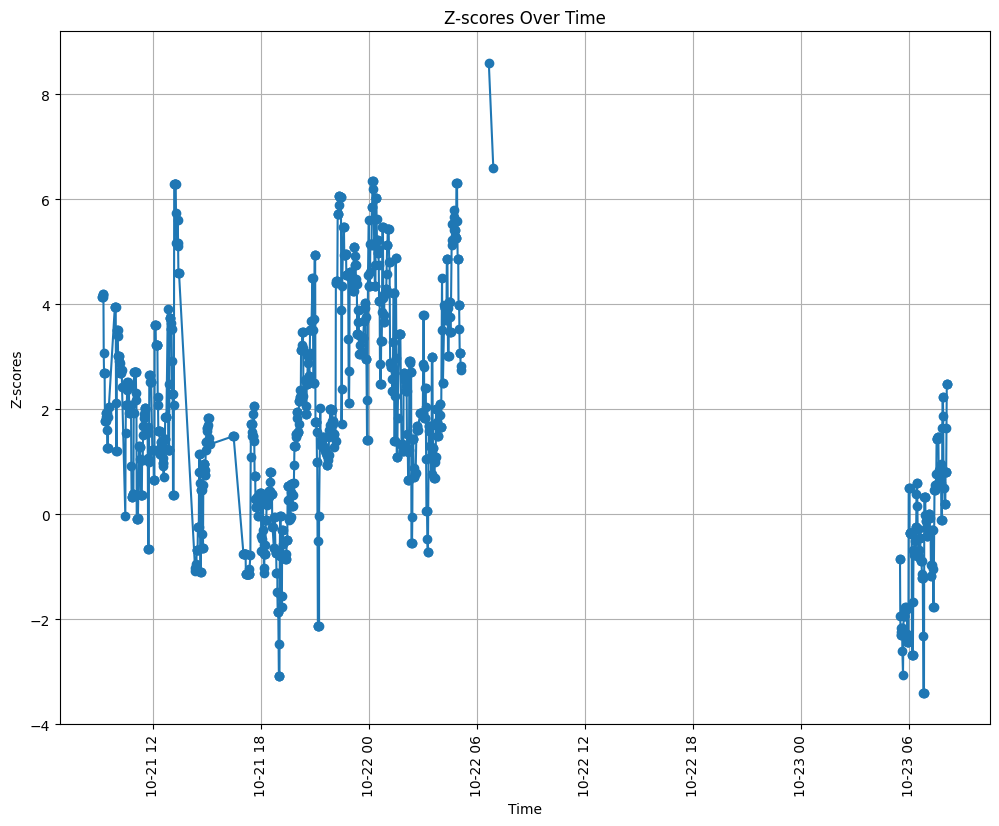

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' with a 'z_scores' column and the required data

# Create a line plot of 'z_scores' with respect to 'time'
plt.figure(figsize=(12, 9))
plt.plot(df_filtered['time'], df_filtered['z_scores'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Z-scores')
plt.title('Z-scores Over Time')
plt.xticks(rotation=90)
plt.grid(True)

plt.show()

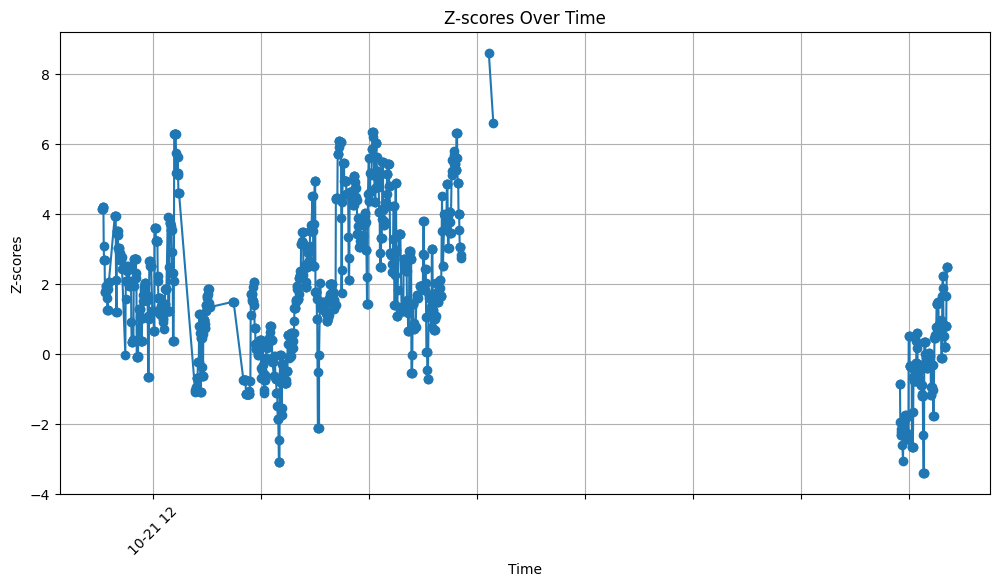

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_filtered' with a 'z_scores' column and the required data

# Create a line plot of 'z_scores' with respect to 'time'
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['time'], df_filtered['z_scores'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Z-scores')
plt.title('Z-scores Over Time')

# Option 1: Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Option 2: Display fewer x-axis labels by using every nth label
every_nth = 20  # Adjust as needed to control the number of displayed labels
for i, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if i % every_nth != 0:
        label.set_visible(False)

plt.grid(True)

plt.show()

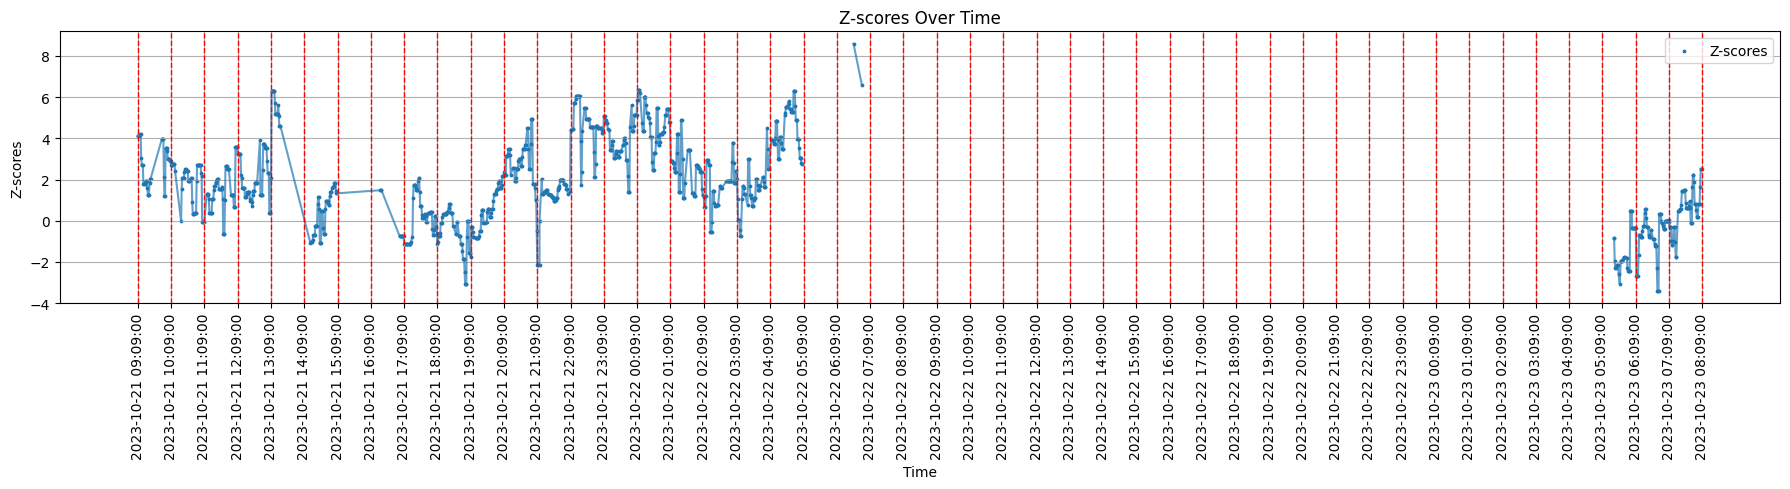

In [134]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered['time'] is already a datetime or timestamp series
df_filtered['time'] = pd.to_datetime(df_filtered['time'])

# Create a figure and a 1x1 subplot grid
fig, ax = plt.subplots(figsize=(18, 5))

# Plot the "z_scores" with vertical lines at hourly intervals
ax.scatter(df_filtered['time'], df_filtered['z_scores'], label='Z-scores', color='tab:blue', s=3)
ax.plot(df_filtered['time'], df_filtered['z_scores'], color='tab:blue', linestyle='-', marker='', alpha=0.7)

# Customize x-axis ticks as hourly intervals
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')
ax.set_xticks(hourly_intervals)
ax.set_xticklabels(hourly_intervals, rotation=90)

# Add vertical lines for each hour
for interval in hourly_intervals:
    ax.axvline(interval, color='red', linestyle='--', linewidth=1)

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Z-scores')
ax.set_title('Z-scores Over Time')

# Add a grid
ax.grid(True)

# Show the legend
ax.legend()

plt.tight_layout()  # To ensure the plot looks nice
plt.show()

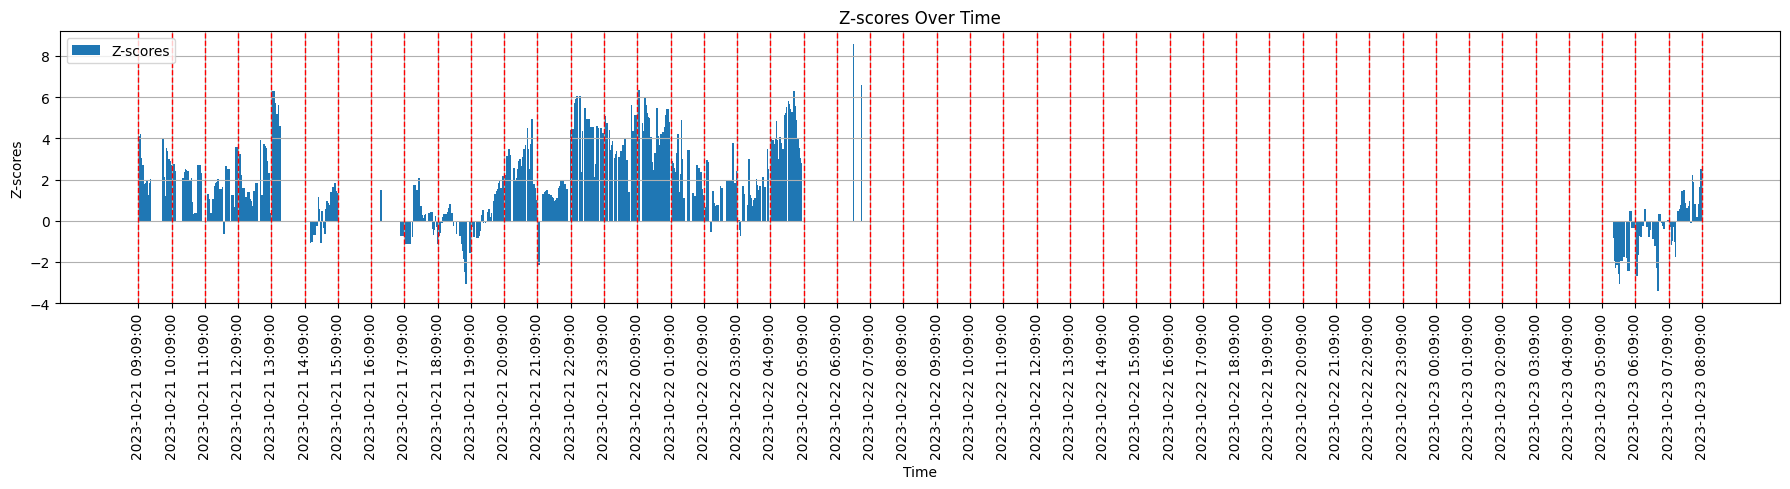

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered['time'] is already a datetime or timestamp series
df_filtered['time'] = pd.to_datetime(df_filtered['time'])

# Create a figure and a 1x1 subplot grid
fig, ax = plt.subplots(figsize=(18, 5))

# Create a bar plot for "z_scores" with vertical lines at hourly intervals
ax.bar(df_filtered['time'], df_filtered['z_scores'], width=0.001, align='center', label='Z-scores', color='tab:blue')

# Customize x-axis ticks as hourly intervals
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')
ax.set_xticks(hourly_intervals)
ax.set_xticklabels(hourly_intervals, rotation=90)

# Add vertical lines for each hour
for interval in hourly_intervals:
    ax.axvline(interval, color='red', linestyle='--', linewidth=1)

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Z-scores')
ax.set_title('Z-scores Over Time')

# Add a grid
ax.grid(True)

# Show the legend
ax.legend()

plt.tight_layout()  # To ensure the plot looks nice
plt.show()


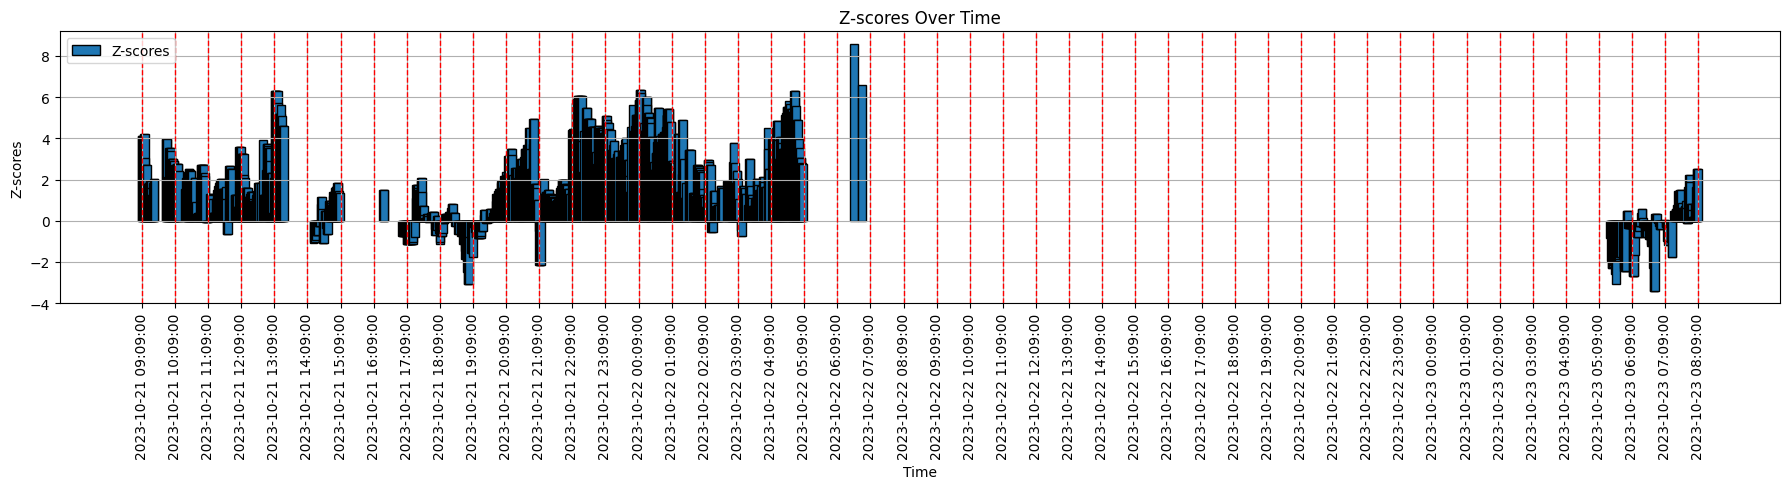

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered['time'] is already a datetime or timestamp series
df_filtered['time'] = pd.to_datetime(df_filtered['time'])

# Create a figure and a 1x1 subplot grid
fig, ax = plt.subplots(figsize=(18, 5))

# Create a bar plot for "z_scores" with vertical lines at hourly intervals
ax.bar(df_filtered['time'], df_filtered['z_scores'], width=0.01, align='center', label='Z-scores', color='tab:blue', edgecolor='black')  # Adding edgecolor to see the outline

# Customize x-axis ticks as hourly intervals
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')
ax.set_xticks(hourly_intervals)
ax.set_xticklabels(hourly_intervals, rotation=90)

# Add vertical lines for each hour
for interval in hourly_intervals:
    ax.axvline(interval, color='red', linestyle='--', linewidth=1)

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Z-scores')
ax.set_title('Z-scores Over Time')

# Add a grid
ax.grid(True)

# Show the legend
ax.legend()

plt.tight_layout()  # To ensure the plot looks nice
plt.show()

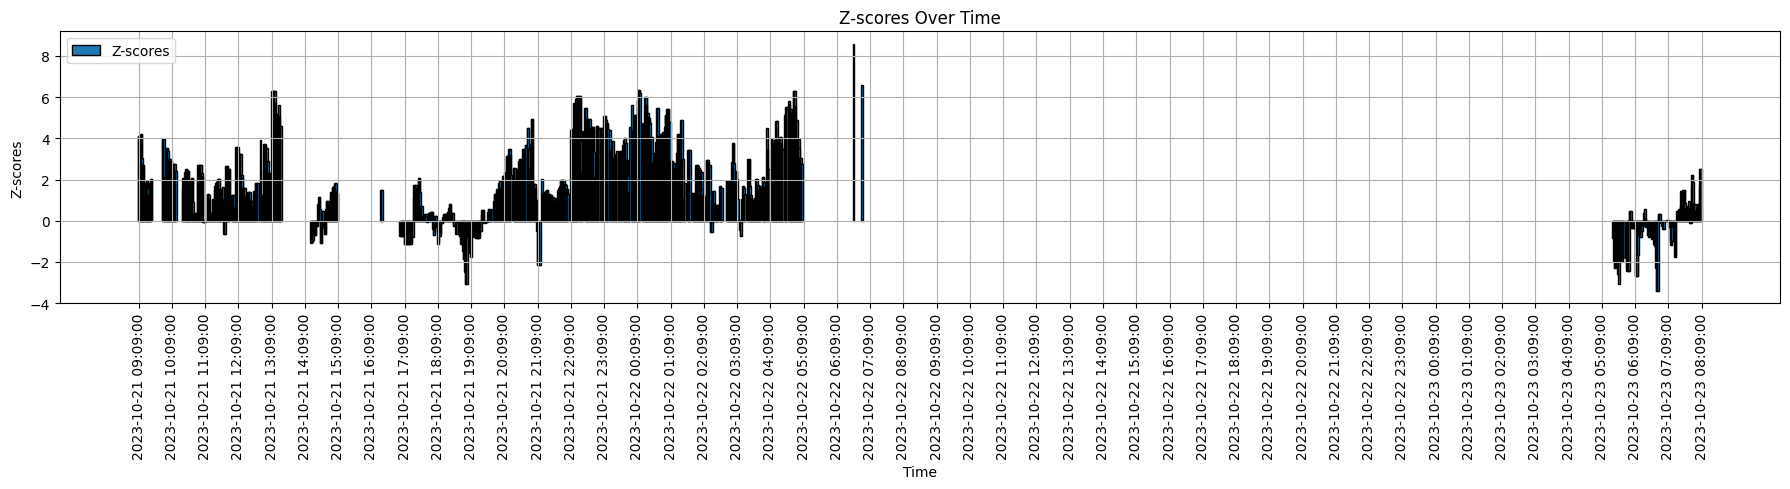

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered['time'] is already a datetime or timestamp series
df_filtered['time'] = pd.to_datetime(df_filtered['time'])

# Create a figure and a 1x1 subplot grid
fig, ax = plt.subplots(figsize=(18, 5))

# Create a bar plot for "z_scores" with vertical lines at hourly intervals
bar_width = 0.002  # Adjust the bar width as needed
ax.bar(df_filtered['time'], df_filtered['z_scores'], width=bar_width, align='center', label='Z-scores', color='tab:blue', edgecolor='black')  # Adding edgecolor to see the outline

# Customize x-axis ticks as hourly intervals
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')
ax.set_xticks(hourly_intervals)
ax.set_xticklabels(hourly_intervals, rotation=90)

# Set labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Z-scores')
ax.set_title('Z-scores Over Time')

# Add a grid
ax.grid(True)

# Show the legend
ax.legend()

plt.tight_layout()  # To ensure the plot looks nice
plt.show()
